In [88]:
import TO_sim.Q_simul as QSIM
# import TO_sim.analytical.order_sec_parameter as OSP
import TO_sim.analytical.sec_order_parameter2 as OSP2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd

In [92]:
import imp
imp.reload(QSIM)
imp.reload(OSP2)


<module 'TO_sim.analytical.sec_order_parameter2' from 'c:\\Users\\kim9y\\Desktop\\Kuramoto\\Kuramoto-model\\TO_sim\\analytical\\sec_order_parameter2.py'>

In [3]:
K_ = np.linspace(0,15,1000)

In [4]:
m = 5
F_RMd,F_RMu,F_R0d,F_R0u =  OSP2.Make_R_function(m)
N = 1000
K = 4.1
Qsimul = QSIM.Q_Norm_simul(N,K=K,m = m,t_end=1000)
sol = Qsimul.solve()
cluster_info = Qsimul.get_cluster()
r_clu_info = Qsimul.get_r_clu()
TLO_info = Qsimul.TLO(K_end=10)

In [5]:
TLO_info['r_info']['r_mean']

0.0     0.026377
0.1     0.025731
0.2      0.02507
0.3     0.024431
0.4     0.024053
          ...   
9.6     0.883332
9.7     0.887372
9.8     0.888184
9.9     0.893354
10.0    0.895852
Name: r_mean, Length: 101, dtype: object

In [6]:
TLO_info['r_info']['r_mean'].dropna()

0.0     0.026377
0.1     0.025731
0.2      0.02507
0.3     0.024431
0.4     0.024053
          ...   
9.6     0.883332
9.7     0.887372
9.8     0.888184
9.9     0.893354
10.0    0.895852
Name: r_mean, Length: 101, dtype: object

In [7]:
Ks = TLO_info['Ks']
r_info = TLO_info['r_info']
TLO_info['cluster_info']['S+'].dropna() 

5.2    84
5.3    89
5.4    90
5.5    91
5.6    92
5.7    94
5.8    86
5.9    65
6.0    67
6.1    68
6.2    68
6.3    68
6.4    66
6.5    61
6.7    54
6.8    55
6.9    55
7.0    42
7.1    43
7.2    44
7.3    44
7.4    44
7.5    44
7.6    37
7.7    37
7.8    37
Name: S+, dtype: object

In [9]:
Ks = TLO_info['Theta_last'].index
K_end = 5.2
iloc = np.searchsorted(Ks,K_end)
Theta_last = TLO_info['Theta_last'].iloc[iloc].to_numpy(float)

In [10]:
TLO_back_info = Qsimul.TLO_back(Theta_last,K_end)

In [11]:
Ks_back = TLO_back_info['Ks']
r_info_back = TLO_back_info['r_info']
cluster_info_back = TLO_back_info['r_info']

In [12]:
TLO_info['cluster_info']

,S0,S+,S-,S+_total,S-_total,v0,v+,v-,v+_total,v-_total,...,min_O0,min_O+,min_O-,min_O+_total,min_O-_total,mean_O0,mean_O+,mean_O-,mean_O+_total,mean_O-_total
0.0,NaN,NaN,NaN,500,500,NaN,NaN,NaN,0.795087,-0.795087,...,NaN,NaN,NaN,0.001252,-3.090529,NaN,NaN,NaN,0.795087,-0.795087
0.1,NaN,NaN,NaN,500,500,NaN,NaN,NaN,0.795085,-0.795085,...,NaN,NaN,NaN,0.001252,-3.090529,NaN,NaN,NaN,0.795087,-0.795087
0.2,NaN,NaN,NaN,500,500,NaN,NaN,NaN,0.795083,-0.795083,...,NaN,NaN,NaN,0.001252,-3.090529,NaN,NaN,NaN,0.795087,-0.795087
0.3,NaN,NaN,NaN,500,500,NaN,NaN,NaN,0.795078,-0.795078,...,NaN,NaN,NaN,0.001252,-3.090529,NaN,NaN,NaN,0.795087,-0.795087
0.4,NaN,NaN,NaN,500,500,NaN,NaN,NaN,0.795077,-0.795077,...,NaN,NaN,NaN,0.001252,-3.090529,NaN,NaN,NaN,0.795087,-0.795087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.6,910,NaN,NaN,45,45,-0.000006,NaN,NaN,1.842965,-1.842752,...,-1.685417,NaN,NaN,1.695872,-3.090529,-0.0,NaN,NaN,2.085653,-2.085653
9.7,913,NaN,NaN,43,44,0.001215,NaN,NaN,1.862547,-1.845395,...,-1.695872,NaN,NaN,1.717356,-3.090529,0.001869,NaN,NaN,2.103535,-2.094511
9.8,914,NaN,NaN,43,43,-0.000183,NaN,NaN,1.854826,-1.851293,...,-1.706516,NaN,NaN,1.717356,-3.090529,0.0,NaN,NaN,2.103535,-2.103535
9.9,918,NaN,NaN,41,41,0.000056,NaN,NaN,1.873712,-1.874507,...,-1.728403,NaN,NaN,1.739664,-3.090529,-0.0,NaN,NaN,2.122103,-2.122103


Text(0.5, 0, '$K$')

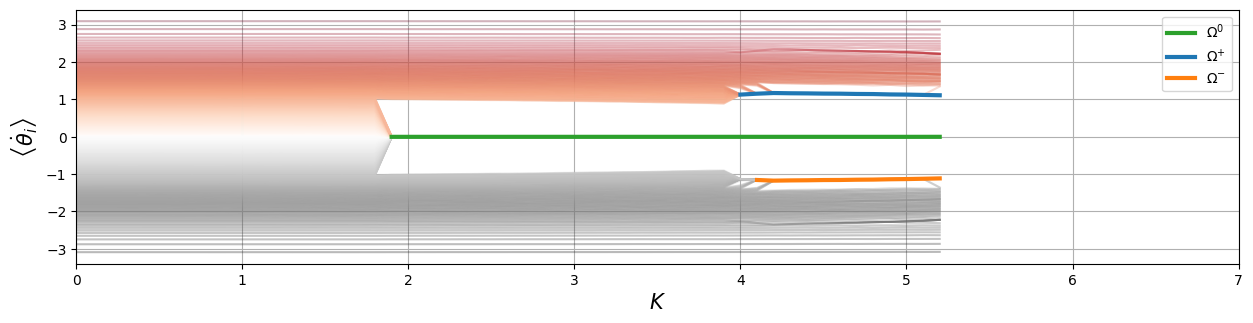

In [15]:
# plt.plot(TLO_back_info['avg_dtheta'].iloc[iloc+6]);
# plt.plot(TLO_back_info['avg_dtheta'].iloc[iloc+7]);
# plt.plot(TLO_back_info['avg_dtheta'].iloc[iloc+10]);
# plt.plot(TLO_back_info['avg_dtheta'].iloc[iloc+15]);
plt.figure(figsize=(15,3.3),dpi=100)
ln = plt.plot(TLO_back_info['avg_dtheta']);
NORM = lambda x :(x-np.min(x))/(np.max(x)-np.min(x))
omega = Qsimul.omega
color = plt.cm.RdGy_r(NORM(omega),alpha=0.3)
# ln = plt.plot(t[sum_time:],avg_dtheta);
sca = plt.scatter(0*omega,0*omega,c=omega,s=0);
for i,l in enumerate(ln):
    l.set_color(color[i])
plt.plot(TLO_back_info['cluster_info']['v0'],lw=3,color='tab:green',label=r'$\Omega^{0}$')
plt.plot(TLO_back_info['cluster_info']['v+'],lw=3,color='tab:blue',label=r'$\Omega^{+}$')
plt.plot(TLO_back_info['cluster_info']['v-'],lw=3,color='tab:orange',label=r'$\Omega^{-}$')
# plt.axhline(0,color='black',zorder=0)
plt.ylabel(r'$\left\langle\dot{\theta}_i\right\rangle$',size=15)
plt.legend()
plt.grid()
plt.xlim(0,7)
plt.xlabel('$K$',fontsize=15)

Text(0.5, 0, '$K$')

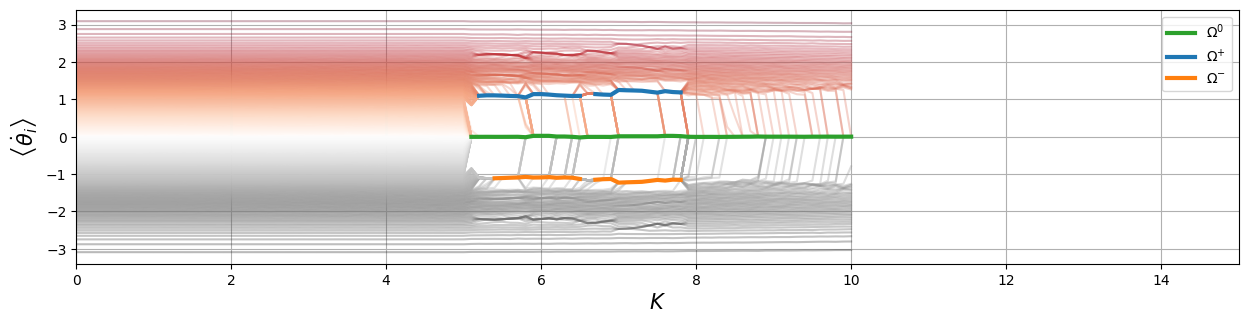

In [16]:
# plt.plot(TLO_info['avg_dtheta'].iloc[iloc+6]);
# plt.plot(TLO_info['avg_dtheta'].iloc[iloc+7]);
# plt.plot(TLO_info['avg_dtheta'].iloc[iloc+10]);
# plt.plot(TLO_info['avg_dtheta'].iloc[iloc+15]);
plt.figure(figsize=(15,3.3),dpi=100)
ln = plt.plot(TLO_info['avg_dtheta']);
NORM = lambda x :(x-np.min(x))/(np.max(x)-np.min(x))
omega = Qsimul.omega
color = plt.cm.RdGy_r(NORM(omega),alpha=0.3)
# ln = plt.plot(t[sum_time:],avg_dtheta);
sca = plt.scatter(0*omega,0*omega,c=omega,s=0);
for i,l in enumerate(ln):
    l.set_color(color[i])
plt.plot(TLO_info['cluster_info']['v0'],lw=3,color='tab:green',label=r'$\Omega^{0}$')
plt.plot(TLO_info['cluster_info']['v+'],lw=3,color='tab:blue',label=r'$\Omega^{+}$')
plt.plot(TLO_info['cluster_info']['v-'],lw=3,color='tab:orange',label=r'$\Omega^{-}$')
# plt.axhline(0,color='black',zorder=0)
plt.ylabel(r'$\left\langle\dot{\theta}_i\right\rangle$',size=15)
plt.legend()
plt.grid()
plt.xlim(0,15)
plt.xlabel('$K$',fontsize=15)

5.2
7.0


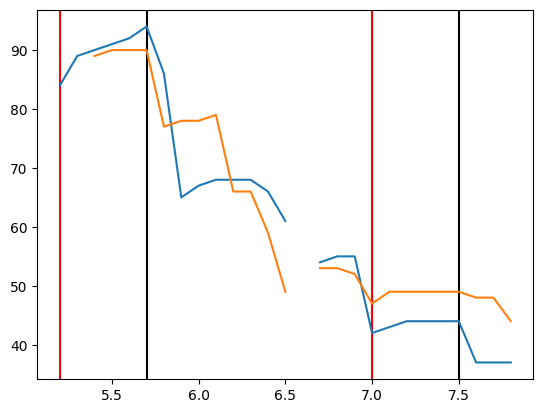

In [17]:
STEP_start,STEP_end = Qsimul.get_STEP(TLO_info,s_length=3)
S0 =TLO_info['cluster_info']['S0']
SP =TLO_info['cluster_info']['S+']
SM =TLO_info['cluster_info']['S-']

for S in STEP_start:
    plt.axvline(S,color='red')
    print(S)


for S in STEP_end:
    plt.axvline(S,color='black')
# plt.plot(Ks,S0)
plt.plot(Ks,SP)
plt.plot(Ks,SM)
# Ks[A[:-1]+1]


In [19]:
_,_,rs_d,rs_u,_,_= OSP2.get_r_sec_np(Ks,m,F_RMu,samples=30) 

In [1250]:
TLO_info['r_info']['r+_total'].dropna()

0.0     0.017329
0.1     0.015072
0.2     0.017583
0.3     0.018833
0.4      0.01796
          ...   
9.6     0.052333
9.7     0.052501
9.8     0.048629
9.9      0.04725
10.0    0.043961
Name: r+_total, Length: 101, dtype: object

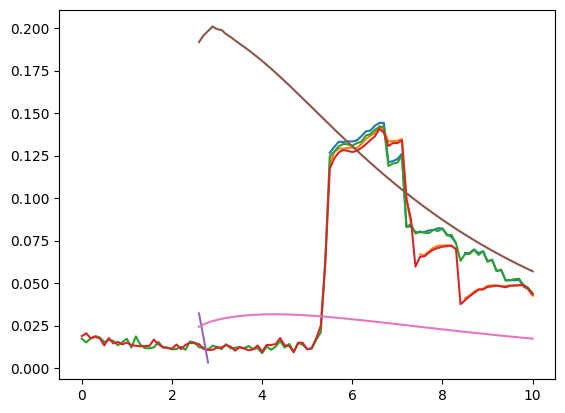

In [1251]:
rP =TLO_info['r_info']['r+']
rM =TLO_info['r_info']['r-']


rPt =TLO_info['r_info']['r+_total']
rMt =TLO_info['r_info']['r-_total']
plt.plot(rP)
plt.plot(rM)

plt.plot(rPt)
plt.plot(rMt)

plt.plot(Ks,rs_d)
plt.plot(Ks,rs_u)



plt.plot(Ks,(F_R0u(Ks)-F_RMu(Ks))/2)


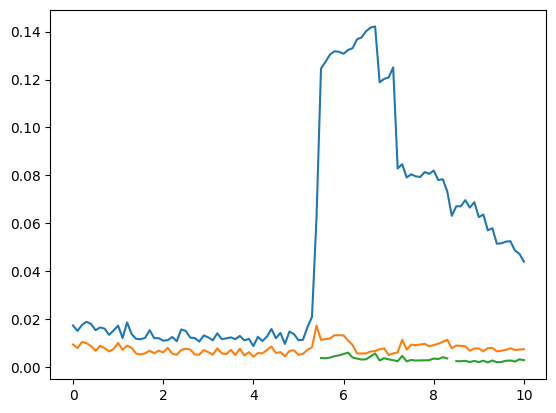

In [1252]:
rPt =TLO_info['r_info']['r+_total']
sigPt =TLO_info['r_info']['sig+_total']
sigP =TLO_info['r_info']['sig+']
plt.plot(rPt)
plt.plot(sigPt)
plt.plot(sigP)

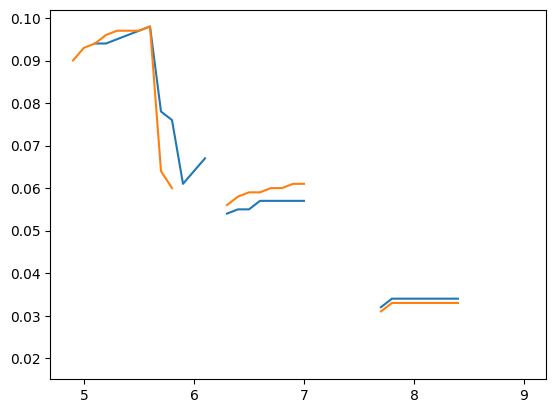

In [92]:
SP =TLO_info['cluster_info']['S+']
SM =TLO_info['cluster_info']['S-']
plt.plot(SP/N)
plt.plot(SM/N)


In [93]:
Ks = TLO_info['Ks']
r_info = TLO_info['r_info']

In [94]:
RS = r_info.columns[0:5]
RS

Index(['r_mean', 'r0', 'r+', 'r-', 'r+_total'], dtype='object')

In [95]:
r_info['r_mean']

0.0     0.026452
0.1     0.026225
0.2     0.020943
0.3     0.023123
0.4     0.022169
          ...   
9.6     0.888155
9.7      0.88842
9.8     0.891176
9.9     0.893705
10.0    0.897396
Name: r_mean, Length: 101, dtype: object

In [1253]:
Qsimul = QSIM.Q_Norm_simul(N,K=K,m = m,t_end=1000)

In [21]:
df_STEP = Qsimul.MAKE_STEP(TLO_info,s_length=3,P_dK=0.2)

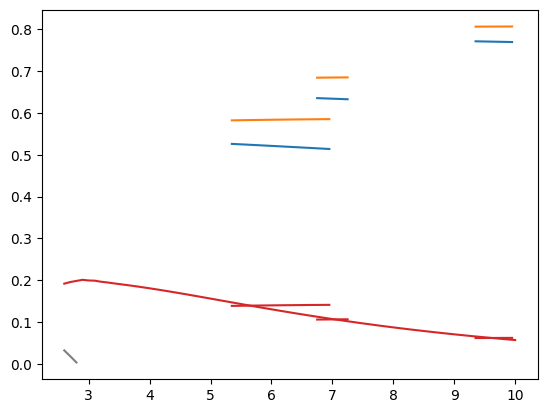

In [1255]:
K_step_index = df_STEP.index
for K_step in K_step_index:
    Ks_step = df_STEP.loc[K_step]['Ks_step']
    F_RMu_s = df_STEP.loc[K_step]['F_RMu']
    F_R0u_s = df_STEP.loc[K_step]['F_R0u']
    rs_d_s = df_STEP.loc[K_step]['rs_d']
    rs_u_s = df_STEP.loc[K_step]['rs_u']
    plt.plot(Ks_step,F_RMu_s(Ks_step),color='tab:blue')
    plt.plot(Ks_step,F_R0u_s(Ks_step),color='tab:orange')
    plt.plot(Ks_step,rs_u_s,color='tab:red')
    plt.plot(Ks_step,rs_d_s,color='tab:gray')

plt.plot(Ks,rs_u,color='tab:red')
plt.plot(Ks,rs_d,color='tab:gray')

In [168]:
cluster_info['c_size']

{'0': 390, '-': 34, '+': 33}

In [596]:
TLO_info['cluster_info'][['S+','S-']].dropna()

,S+,S-
5.0,30,30
5.1,30,30
5.2,32,31
5.3,32,33
5.4,32,33
5.5,32,33
5.6,32,33
5.7,32,31


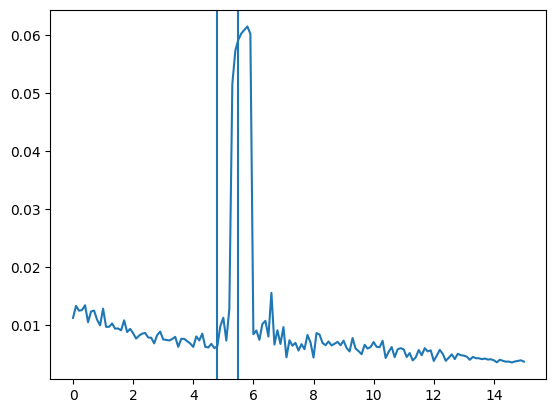

In [657]:
TLO_info['r_info']['sig_mean'].plot()
plt.axvline(4.8)
plt.axvline(5.5)

<Axes: >

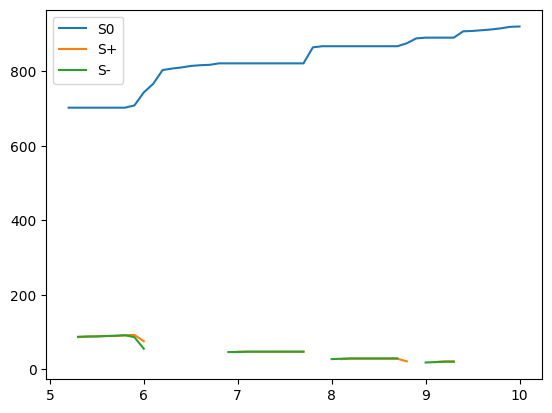

In [1219]:
TLO_info['cluster_info'][['S0','S+','S-']].plot()
# TLO_back_info['cluster_info'][['S0','S+','S-']].plot()


In [14]:
RS = r_info.columns[0:10]
RS

NameError: name 'r_info' is not defined

In [1015]:
Ks_step[S_sidx]

5.1499999999999995

In [1021]:
r_info.loc[5.2]

r_mean        0.549111
r0            0.606757
r+             0.11841
r-            0.119504
r+_total      0.115728
r-_total      0.115748
sig_mean      0.153064
sig0          0.003186
sig+          0.003684
sig-          0.004074
sig+_total    0.008694
sig-_total    0.009756
Name: 5.2, dtype: object

In [18]:
RS

Index(['r_mean', 'r0', 'r+', 'r-', 'r+_total', 'r-_total', 'sig_mean', 'sig0'], dtype='object')

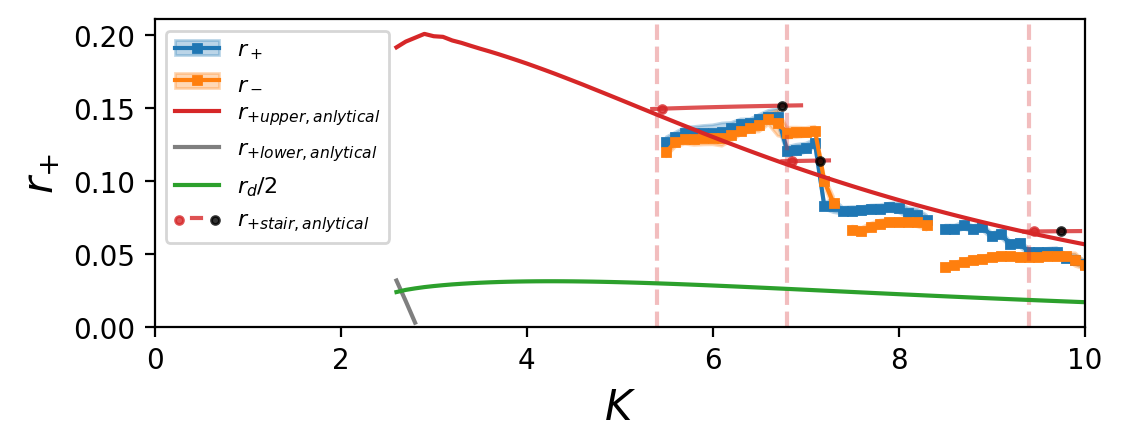

In [23]:
from matplotlib.legend_handler import HandlerLine2D,HandlerTuple
RS = r_info.columns[0:8]
fig = plt.figure(figsize=(6,2),dpi=200)
r_Pl,r_Ml=plt.plot(r_info[RS[2:4]],marker='s',markersize=3)
r_Plf =plt.fill_between(r_info['r+'].index,(r_info['r+']-r_info['sig+']).to_numpy(float),
                 (r_info['r+']+r_info['sig+']).to_numpy(float),color='tab:blue',alpha=0.3)
r_Mlf =plt.fill_between(r_info['r-'].index,(r_info['r-']-r_info['sig-']).to_numpy(float),
                 (r_info['r-']+r_info['sig-']).to_numpy(float),color='tab:orange',alpha=0.3)


K_step_index = df_STEP.index
for K_step in K_step_index[:3]:
    Ks_step = df_STEP.loc[K_step]['Ks_step']
    F_RMu_s = df_STEP.loc[K_step]['F_RMu']
    F_R0u_s = df_STEP.loc[K_step]['F_R0u']
    rs_d_s = df_STEP.loc[K_step]['rs_d']
    rs_u_s = df_STEP.loc[K_step]['rs_u']
    S_start = df_STEP.loc[K_step]['S_start']
    S_end = df_STEP.loc[K_step]['S_end']
    S_sidx = np.searchsorted(Ks_step,S_start)
    S_eidx = np.searchsorted(Ks_step,S_end)
    
    
    plt.axvline(S_start,color ='tab:red',ls='--',alpha=0.3)
    s_ = plt.scatter(Ks_step[S_sidx],rs_u_s[S_sidx],color='tab:red',zorder=5,alpha=0.8,s=8)
    e_ = plt.scatter(Ks_step[S_eidx],rs_u_s[S_eidx],color='black',zorder=5,alpha=0.8,s=8)

    # plt.plot(Ks_step,F_RMu_s(Ks_step),color='tab:blue')
    A = (F_R0u_s(Ks_step[S_sidx])-F_RMu_s(Ks_step[S_sidx]))/2
    # plt.plot(Ks_step,rs_u_s[S_sidx]-A+(F_R0u_s(Ks_step)-F_RMu_s(Ks_step))/2,color='tab:red')
    # plt.plot(Ks_step,rs_u_s[S_sidx]-A+(F_R0u_s(Ks_step)-F_RMu_s(Ks_step))/2,color='tab:blue')
    l_, = plt.plot(Ks_step,rs_u_s,color='tab:red',zorder=4,alpha=0.8)

step_a = (s_,l_,e_)

SU, = plt.plot(Ks,rs_u,color='tab:red')
SD, = plt.plot(Ks,rs_d,color='tab:gray')
r_dl, =plt.plot(Ks,(F_R0u(Ks)-F_RMu(Ks))/2)

plt.legend([(r_Pl,r_Plf),(r_Ml,r_Mlf),SU,SD,r_dl,step_a],['$r_+$','$r_-$','$r_{+upper,anlytical}$','$r_{+lower,anlytical}$','$r_d/2$','$r_{+stair,anlytical}$'],handler_map={step_a: HandlerTuple(ndivide=None)},fontsize=8)
# plt.plot(Ks_S,F4_RMu(Ks_S))
# plt.plot(Ks_S,F4_R0u(Ks_S))
# plt.plot(Ks,F_RMu(Ks))
# plt.plot(Ks,F_R0u(Ks))

# plt.plot(Ks_back,rs_dbl)
# plt.plot(Ks_back,rs_ubl)

plt.ylim(0)
plt.xlim(0,10)
plt.ylabel('$r_{+}$',fontsize=15)
plt.xlabel('$K$',fontsize=15)
plt.show()

In [16]:
RS = r_info.columns[0:8]
RS

Index(['r_mean', 'r0', 'r+', 'r-', 'r+_total', 'r-_total', 'sig_mean', 'sig0'], dtype='object')

Text(0, 0.5, '$r_0$')

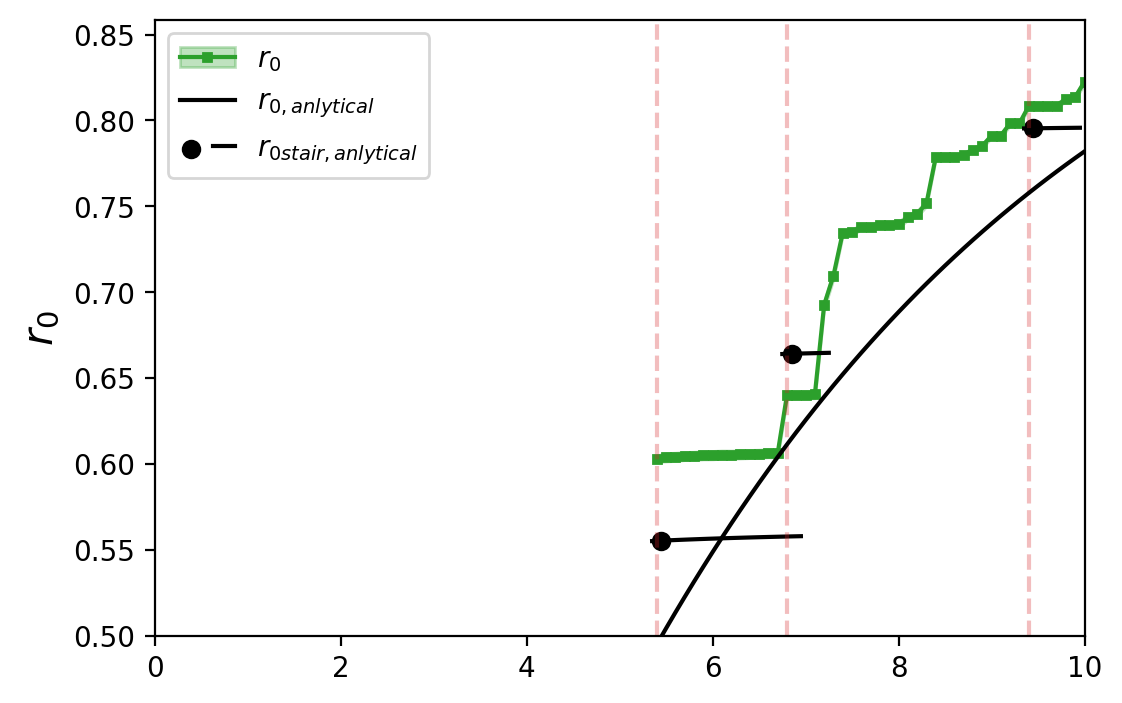

In [24]:
RS = r_info.columns[0:8]
fig = plt.figure(figsize=(6,4),dpi=200)
r_0l, = plt.plot(r_info[RS[1]],color='tab:green',marker='s',markersize=3)
r_0lf = plt.fill_between(r_info[RS[1]].index,(r_info[RS[1]]-r_info['sig0']).to_numpy(float),
                 (r_info[RS[1]]+r_info['sig0']).to_numpy(float),color='tab:green',alpha=0.3)


K_step_index = df_STEP.index
for K_step in K_step_index[:4]:
    Ks_step = df_STEP.loc[K_step]['Ks_step']
    F_RMu_s = df_STEP.loc[K_step]['F_RMu']
    F_R0u_s = df_STEP.loc[K_step]['F_R0u']
    rs_d_s = df_STEP.loc[K_step]['rs_d']
    rs_u_s = df_STEP.loc[K_step]['rs_u']
    S_start = df_STEP.loc[K_step]['S_start']
    S_end = df_STEP.loc[K_step]['S_end']
    S_sidx = np.searchsorted(Ks_step,S_start)
    S_eidx = np.searchsorted(Ks_step,S_end)
    
    s_ =plt.scatter(Ks_step[S_sidx],F_R0u_s(Ks_step)[S_sidx],color='black')
    l_, =plt.plot(Ks_step,F_R0u_s(Ks_step),color='black')
    plt.axvline(S_start,color ='tab:red',ls='--',alpha=0.3)
step_a = (s_,l_)
R0l, = plt.plot(Ks,F_RMu(Ks),color='black')
plt.legend([(r_0l,r_0lf),R0l,step_a],['$r_0$','$r_{0,anlytical}$','$r_{0stair,anlytical}$'],handler_map={step_a: HandlerTuple(ndivide=None)})

# plt.plot(Ks_S,F4_RMu(Ks_S))
# plt.plot(Ks_S,F4_R0u(Ks_S))
# plt.plot(Ks,F_R0u(Ks))
# plt.plot(Ks,rs_u,color='tab:red')
# plt.plot(Ks,rs_d,color='tab:gray')
plt.ylim(0.5)
plt.xlim(0,10)
plt.ylabel('$r_0$',fontsize=15)
# plt.xlabel('$K$',fontsize=15)

In [ ]:
TLO_info['avg_dtheta'].index

Float64Index([                0.0,                 0.1,                 0.2,
              0.30000000000000004,                 0.4,                 0.5,
               0.6000000000000001,  0.7000000000000001,                 0.8,
                              0.9,
              ...
               14.100000000000001,  14.200000000000001,                14.3,
                             14.4,                14.5,  14.600000000000001,
               14.700000000000001,                14.8,                14.9,
                             15.0],
             dtype='float64', length=151)

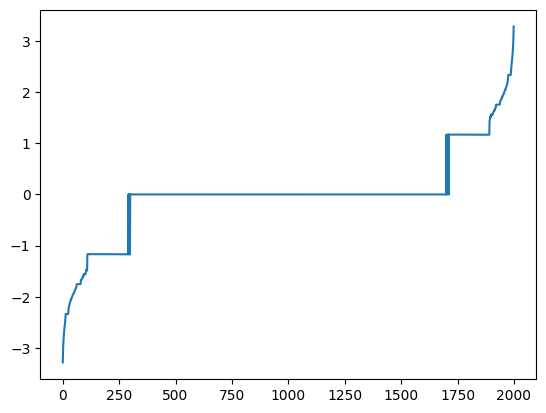

In [ ]:
# plt.plot(TLO_info['avg_dtheta'][250])
# plt.plot(TLO_info['avg_dtheta'][350])
# plt.plot(TLO_info['avg_dtheta'][400])
# plt.plot(TLO_info['avg_dtheta'][400])
# plt.plot(TLO_info['avg_dtheta'].T[5.5])
# plt.plot(TLO_info['avg_dtheta'].iloc[56].T)
# plt.plot(TLO_info['avg_dtheta'].iloc[57].T)
# plt.plot(TLO_info['avg_dtheta'].iloc[58].T)
# plt.plot(TLO_info['avg_dtheta'].iloc[59].T)
plt.plot(TLO_info['avg_dtheta'].iloc[62].T)

# plt.plot(TLO_info['avg_dtheta'].iloc[64].T)
# plt.plot(TLO_info['avg_dtheta'].iloc[65].T)

# plt.plot(TLO_info['avg_dtheta'][450])
# plt.plot(TLO_info['avg_dtheta'][470])
# plt.plot(TLO_info['avg_dtheta'][480])

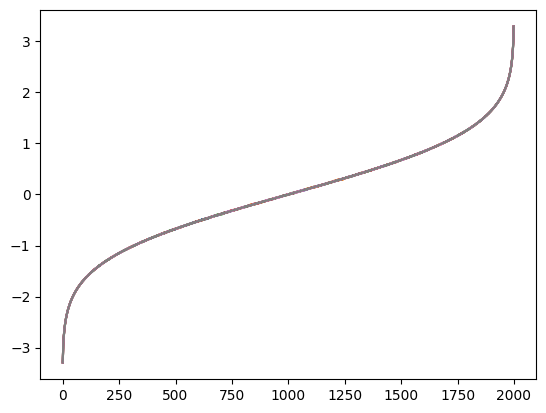

In [ ]:
# plt.plot(TLO_info['avg_dtheta'][250])
# plt.plot(TLO_info['avg_dtheta'][350])
# plt.plot(TLO_info['avg_dtheta'][400])
# plt.plot(TLO_info['avg_dtheta'][400])
plt.plot(TLO_back_info['avg_dtheta'].T[5.5])
plt.plot(TLO_back_info['avg_dtheta'].iloc[54].T)
plt.plot(TLO_back_info['avg_dtheta'].iloc[53].T)
plt.plot(TLO_back_info['avg_dtheta'].iloc[52].T)
plt.plot(TLO_back_info['avg_dtheta'].iloc[51].T)
plt.plot(TLO_back_info['avg_dtheta'].iloc[50].T)
plt.plot(TLO_back_info['avg_dtheta'].iloc[40].T)
plt.plot(TLO_back_info['avg_dtheta'].iloc[34].T)
# plt.plot(TLO_info['avg_dtheta'].iloc[64].T)
# plt.plot(TLO_info['avg_dtheta'].iloc[65].T)

# plt.plot(TLO_info['avg_dtheta'][450])
# plt.plot(TLO_info['avg_dtheta'][470])
# plt.plot(TLO_info['avg_dtheta'][480])

In [ ]:
K_ = np.linspace(0,15,10000)

Text(0.5, 1.0, '$m = 7, N = 1000$')

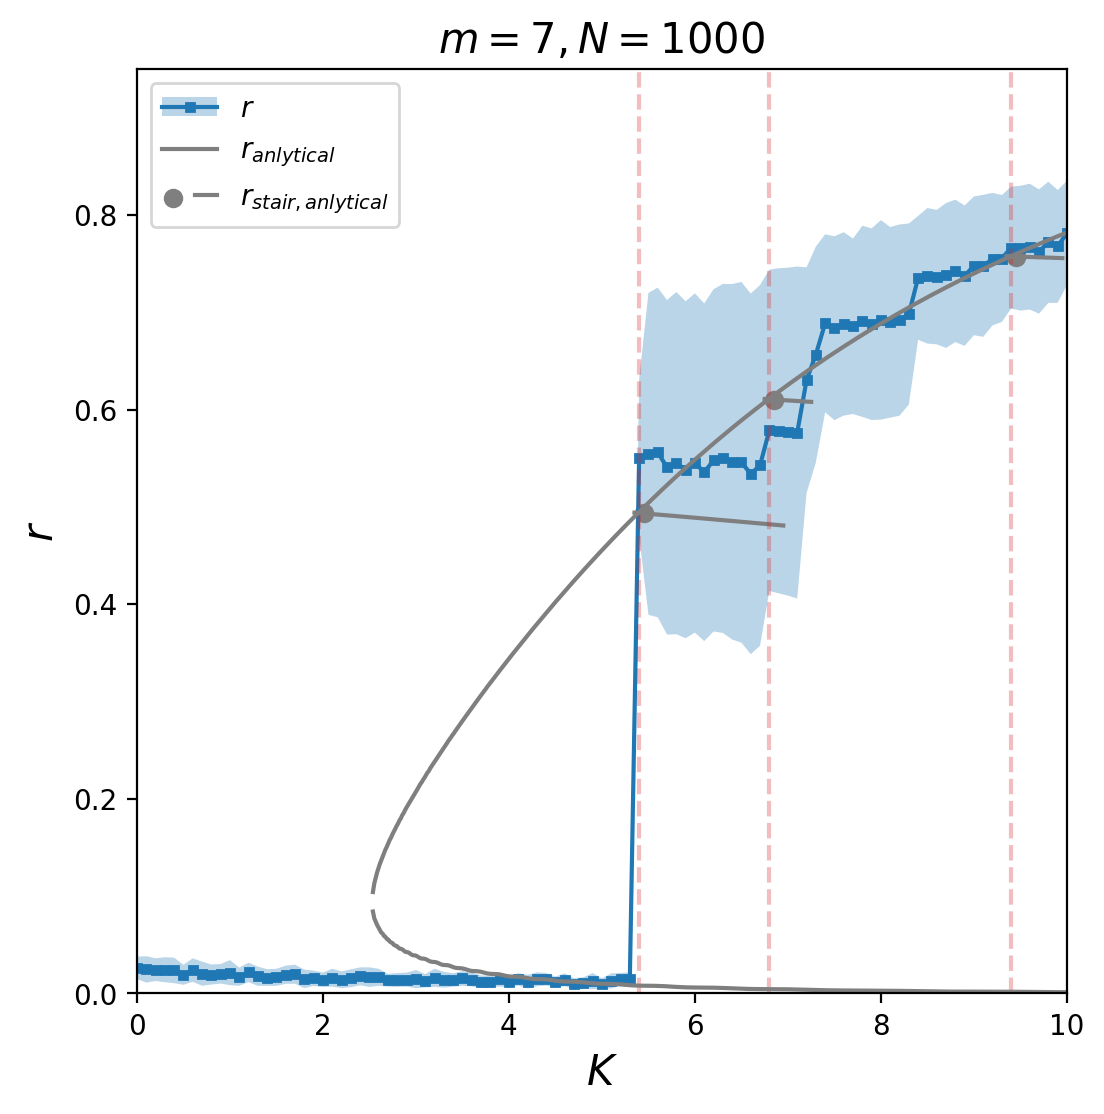

In [26]:
RS = r_info.columns[0:5]
fig = plt.figure(figsize=(6,6),dpi=200)
# plt.plot(r_info[RS[1]],color='tab:green',marker='s',markersize=3)
r_Ml, =plt.plot(r_info[RS[0]],color='tab:blue',marker='s',markersize=3)
# plt.fill_between(r_info[RS[2]],color='tab:green',marker='s',markersize=3)
r_Mlf = plt.fill_between(r_info[RS[4]].index,(r_info[RS[0]]-r_info['sig_mean']).to_numpy(float),
                 (r_info[RS[0]]+r_info['sig_mean']).to_numpy(float),alpha=0.3)



K_step_index = df_STEP.index
for K_step in K_step_index[:]:
    Ks_step = df_STEP.loc[K_step]['Ks_step']
    F_RMu_s = df_STEP.loc[K_step]['F_RMu']
    F_R0u_s = df_STEP.loc[K_step]['F_R0u']
    rs_d_s = df_STEP.loc[K_step]['rs_d']
    rs_u_s = df_STEP.loc[K_step]['rs_u']
    S_start = df_STEP.loc[K_step]['S_start']
    S_end = df_STEP.loc[K_step]['S_end']
    S_sidx = np.searchsorted(Ks_step,S_start)
    S_eidx = np.searchsorted(Ks_step,S_end)
    
    plt.axvline(S_start,color ='tab:red',ls='--',alpha=0.3)
    s_ =plt.scatter(Ks_step[S_sidx],F_RMu_s(Ks_step)[S_sidx],color='tab:grey')
    l_,=plt.plot(Ks_step,F_RMu_s(Ks_step),color='tab:grey')
plt.plot(np.nan,np.nan,color='tab:blue',label ='$r$',marker='s',markersize=3)
# su_ = plt.plot(np.nan,np.nan,color='tab:red',label ='$r+_{upper}$')
step_a = (s_,l_)
RMl, = plt.plot(K_,F_RMu(K_),color='tab:grey')
plt.plot(K_,F_RMd(K_),color='tab:grey')
plt.legend([(r_Ml,r_Mlf),RMl,step_a],['$r$','$r_{anlytical}$','$r_{stair,anlytical}$'],handler_map={step_a: HandlerTuple(ndivide=None)})
# plt.plot(Ks_S,F4_RMu(Ks_S))
# plt.plot(Ks_S,F4_R0u(Ks_S))
# R_STD = OSP.get_rstd(F_R0u(Ks),rs_u,K,m)
# plt.fill_between(Ks,F_R0u(Ks)-R_STD,F_R0u(Ks)+R_STD,alpha=0.3,color='tab:grey')

# plt.plot(Ks,F_R0u(Ks))
# plt.plot(Ks,rs_u,color='tab:red')
# plt.plot(Ks,rs_d,color='tab:gray')
plt.ylim(0.0)
plt.xlim(0,10)
plt.ylabel('$r$',fontsize=15)
plt.xlabel('$K$',fontsize=15)
plt.title(rf'$m = {m}, N = {N}$',fontsize=15)

In [ ]:
K_step_index[:3]

Float64Index([6.2, 7.5, 9.8], dtype='float64')

In [ ]:
S_sidx = np.searchsorted(Ks_step,S_start)
S_sidx

3

## TLO Backward

In [20]:
O_0 = TLO_info['cluster_info'].iloc[iloc]['max_O0']

In [102]:
Ks_ = TLO_back_info['Theta_last'].index
# K_end = 7
iloc = np.searchsorted(Ks_,K_end)
Theta_last = TLO_back_info['Theta_last'].iloc[iloc].to_numpy(float)
O_0 = TLO_back_info['cluster_info'].iloc[iloc]['max_O0']#- TLO_back_info['cluster_info'].iloc[iloc]['mean_O0']
O_20 = TLO_back_info['cluster_info'].iloc[iloc]['max_O+']# - TLO_back_info['cluster_info'].iloc[iloc]['mean_O0']
# r_0 = TLO_info['r_info']['r0'].iloc[iloc]
# O_0 = norm.ppf(r_0/2+0.5)
F0_RMd,F0_RMu,F0_R0d,F0_R0u =  OSP2.Make_R0_function(m,O_0)

In [17]:
_,F0_RMu2,_,F0_R0u2 =  OSP2.Make_R0_function(m,O_20)

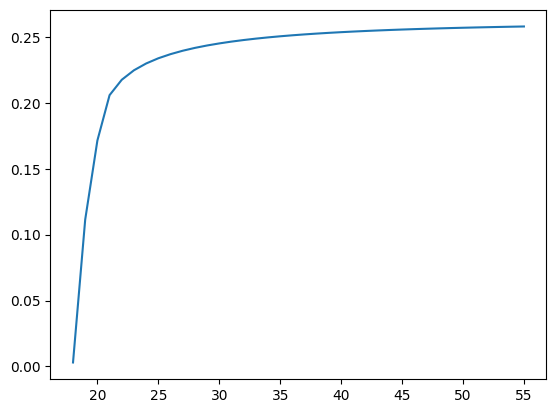

In [140]:
plt.plot(F0_R0u2(Ks_back)-F0_R0u(Ks_back))

In [339]:
Ks = TLO_info['Theta_last'].index
iloc = np.searchsorted(Ks,K_end)
Theta_last = TLO_info['Theta_last'].iloc[iloc].to_numpy(float)
TLO_back_info = Qsimul.TLO_back(Theta_last,K_end)

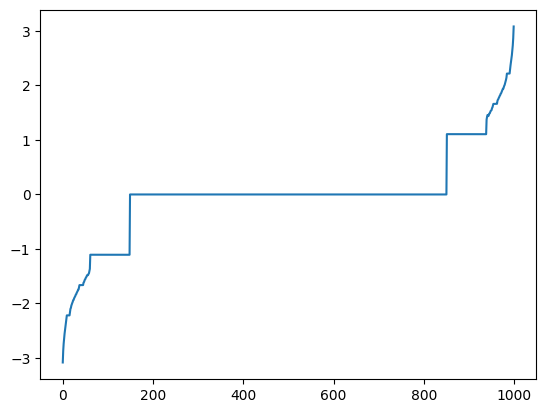

In [19]:
plt.plot(TLO_info['avg_dtheta'].iloc[iloc].T)


In [341]:
O_20 = TLO_info['cluster_info'].iloc[iloc]['max_O+']

In [342]:
rp_ = TLO_info['r_info'].iloc[iloc]['r+']
rm_ = TLO_info['r_info'].iloc[iloc]['r_mean']

In [225]:
4/np.pi*np.sqrt(rm_*K_end/m) - 0.3056/np.sqrt(m**3*rm_*K_end) #+ 4/np.pi*np.sqrt(rp_*K_end/m)

NameError: name 'rm_' is not defined

In [226]:
O_02 = TLO_info['cluster_info'].iloc[iloc]['max_O+']

In [18]:
O_0 = TLO_info['cluster_info'].iloc[iloc]['max_O0']
O_0,TLO_info['cluster_info'].iloc[iloc]['min_O0'],TLO_info['cluster_info'].iloc[iloc]['mean_O0'],TLO_info['cluster_info'].iloc[iloc]['v+']

(0.853095415419262,
 -0.8675981024343331,
 -0.007034500092332273,
 1.0653776396222554)

In [19]:
O_20

1.5067758106106854

In [20]:
Rp = r_info_back['r+_total'].to_numpy(float)
RM = r_info_back['r_mean'].to_numpy(float)
R0 = r_info_back['r0'].to_numpy(float)

# O_02s = O_0 + 4/np.pi*np.sqrt(rp*Ks_back[:50]/m)- 0.3056/np.sqrt(m**3*rp*Ks_back[:50])
# Od = O_0 + rp*Ks_back[:50]
# Od2 = rM*Ks_back[:50] 

In [229]:
plt.plot(O_02s)
plt.plot(Od)
plt.axhline(O_02)
plt.plot(Od2/2-O_02s)
# plt.axvline(np.searchsorted(Od2/2-O_02s,0))
plt.axhline(0)

NameError: name 'O_02s' is not defined

In [1209]:
# Ks_back = np.arange(0.0,K_end+0.1/2,0.1)
_,_,rs_db,rs_ub,_,_= OSP2.get_r_sec_np(Ks_back,m,F0_RMu,samples=30)

In [350]:
O_02s = O_0 + 4/np.pi*np.sqrt(rs_ub*Ks_back/m)- 0.3056/np.sqrt(m**3*rs_ub*Ks_back)

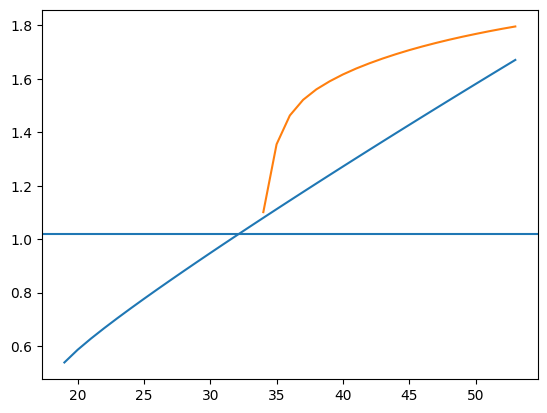

In [353]:
Opms = 4/np.pi*np.sqrt(F0_RMu(Ks_back)*Ks_back)
Ods = F0_RMu(Ks_back)*Ks_back
plt.plot(Ods/2)
plt.plot(O_0+4/np.pi*(rs_ub*Ks_back)**0.5- 0.3056/np.sqrt(m**3*rs_ub*Ks_back))
# plt.plot(Od2)
# plt.plot(Opms)
# plt.plot(Ks_back,Opms)
# plt.plot(Ks_back,(Ods/2-O_20))
plt.axhline(O_0)

ValueError: operands could not be broadcast together with shapes (50,) (54,) 

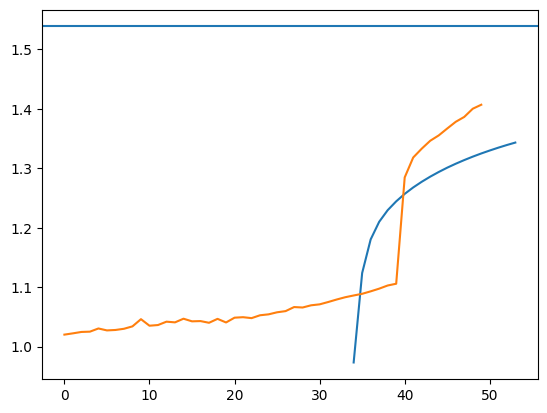

In [354]:
plt.plot(O_02s)
plt.plot(Od)
plt.axhline(O_02)
plt.plot(Od2/2-O_02s)
idx, = np.where(Od2/2-O_02s<0)
print(idx)
# plt.axvline(np.where(Od2/2-O_02s<0,Ks_back,np.nan))

plt.axhline(0)

In [ ]:
O_0

1.0200762327862016

In [127]:
import imp
imp.reload(QSIM)
imp.reload(OSP2)

<module 'TO_sim.analytical.sec_order_parameter2' from '/Users/kimgug-young/Desktop/KURAMOTO 1st order/Kuramoto-model/TO_sim/analytical/sec_order_parameter2.py'>

In [22]:
TLO_back_info['cluster_info'].iloc[iloc]['min_O+']

1.0242985011311287

In [23]:
Rp = r_info_back['r+_total'].to_numpy(float)
RP = r_info_back['r+'].to_numpy(float)
RM = r_info_back['r_mean'].to_numpy(float)
R0 = r_info_back['r0'].to_numpy(float)
R0_ = F0_R0u(K_end)
RM_ = F0_RMu(K_end)
O_0s = TLO_back_info['cluster_info']['max_O0'].to_numpy(float)-TLO_back_info['cluster_info']['mean_O0'].to_numpy(float)


In [24]:
RP[-1]

0.08213282591157303

In [25]:
norm.cdf(O_0s) - norm.cdf(-O_0s), 

(array([       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan, 0.69440237,
        0.69440237, 0.69440237, 0.69440237, 0.69440237, 0.69440237,
        0.69440237, 0.69440237, 0.69440237, 0.69440237, 0.69440237,
        0.69440237, 0.69440237, 0.69440237, 0.69440237, 0.69440237,
        0.69440237, 0.69440237, 0.69440237, 0.69440237, 0.69440237,
        0.69440237, 0.69440237, 0.69440237, 0.69440237, 0.69440237,
        0.69440237, 0.69440237, 0.69440237, 0.69440237, 0.69440237,
        0.69440237, 0.69440237, 0.69440237]),)

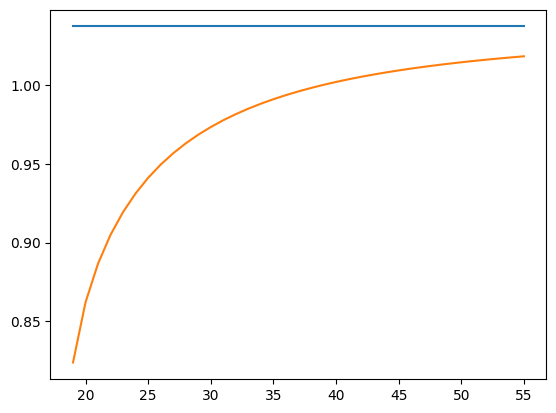

In [90]:
plt.plot(O_0s)
plt.plot(norm.ppf(r0/2+0.5))

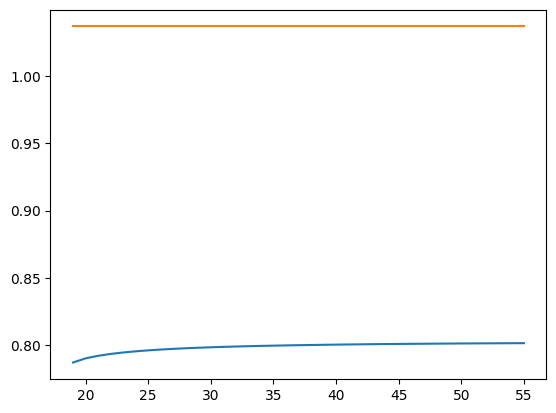

In [75]:
plt.plot(norm.cdf(R0/2+0.5))
plt.plot(O_0s)

In [26]:
O_O = 4/np.pi * np.sqrt(RM[-1]*K_end/m) - 0.3056*1/np.sqrt(K_end*RM[-1]*m**3)
O_0s = TLO_back_info['cluster_info']['max_O0'].to_numpy(float)-TLO_back_info['cluster_info']['mean_O0'].to_numpy(float)

In [27]:
O_O,O_0

(1.0172553498502623, 1.024503257041621)

In [103]:
rM = F0_RMu(K_end)
r0 = F0_R0u(K_end)
# F0_RMd,F0_RMu,F0_R0d,F0_R0u =  OSP2.Make_R0_function(m,O_0)
O_O = 4/np.pi * np.sqrt(rM*K_end/m) - 0.3056*1/np.sqrt(K_end*rM*m**3)
# _,_,_,r2,_,_= OSP2.get_r_sec_np(K_end,m,F0_RMu,samples=30)

In [106]:
_,r__,_,r2,_,_= OSP2.get_r_sec_np(K_end,m,F_RMu,samples=30)

In [105]:
O_O,O_0

(1.0162698328975877, 1.0200762327862016)

In [64]:
r2 , RP[-1],r__,Rp[-1]

(array([0.07715741]),
 0.08213282591157303,
 array([0.07632196]),
 0.07902284753810014)

In [107]:
r0 = F0_R0u(Ks_back) #RM[-1]
# r2 = Rp[-1]
rM = F0_RMu(Ks_back[-1]) #RM[-1]
shift_O = -(K_end**2*r2*r0[-1])/(2*m*(1/m**2+(O_O)**2)) -(K_end**2*r2*r2)/(2*m*(1/m**2+(O_O)**2))

O_2pm = O_O-shift_O
O_P2 =  + 4/np.pi * np.sqrt(r2*K_end/m) - 0.3056*1/np.sqrt(K_end*r2*m**3)
O_2O = O_O-shift_O + O_P2

In [108]:
O_O,O_0,O_2O,O_20

(1.0162698328975877,
 1.0200762327862016,
 array([1.48639019]),
 1.5067758106106857)

In [60]:
r0,R0[-1], r0

(array([       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan, 0.590057  ,
        0.61141031, 0.62477968, 0.6345552 , 0.64214914, 0.64827917,
        0.65335206, 0.65762525, 0.66127236, 0.66442739, 0.66717962,
        0.66960075, 0.67174189, 0.67365239, 0.67536283, 0.67690218,
        0.67829252, 0.67955408, 0.6807058 , 0.68175706, 0.68272018,
        0.68360582, 0.68442213, 0.68517579, 0.68587468, 0.68652379,
        0.68712668, 0.68768855, 0.68821361, 0.68870394, 0.68916392,
        0.689595  , 0.69000001, 0.69038124, 0.69074049, 0.69107893,
        0.69139875]),
 0.6931503111503948,
 array([       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
     

In [33]:
Ks_back,r0[-1],m,O_O,O_2O,F0_R0u

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [51]:
O_0,O_O,O_20,O_2O

(1.024503257041621, 1.0183601206307578, 1.511202834866105, array([1.48343078]))

In [109]:
d,u,rs_db2,rs_ub2= OSP2.get_r_sec0_np(Ks_back,r0[-1],shift_O,m,O_0,O_20,F0_R0u,samples=30)

In [63]:
R0[-1],r0[-1]

(0.6931503111503948, 0.6913987466849333)

In [58]:
F_S =  OSP2.get_shift(O_O)

In [59]:
F_S(O_P2) , shift_O

(array([0.24916984]), array([-0.14754871]))

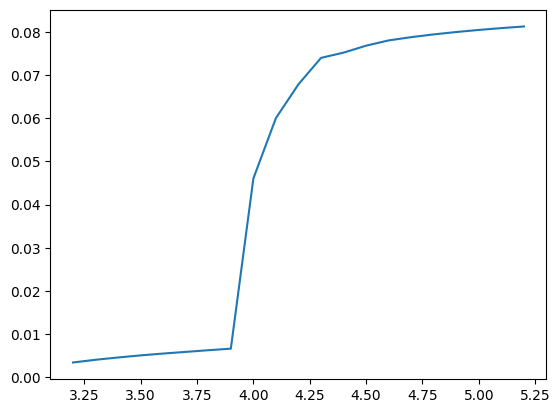

In [110]:
plt.plot(Ks_back,rs_ub2)
plt.plot(Ks_back,rs_db2)

# plt.plot(Ks_back,rs_ub)
# plt.plot(Ks_back,rs_db)


In [777]:
def get_O_r(r,r2):
    r_s = np.linspace(r/2+0.5,r/2+r2+0.5,5000,endpoint=False)
    A = norm.ppf(r_s)
    return np.mean(A)
get_O_r = np.vectorize(get_O_r)

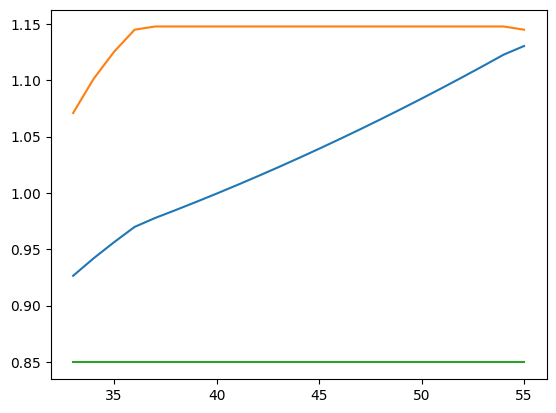

In [87]:
minO = TLO_back_info['cluster_info']['min_O+'].to_numpy(float)
meanO = TLO_back_info['cluster_info']['mean_O+'].to_numpy(float)
maxO = TLO_back_info['cluster_info']['max_O+'].to_numpy(float)
# maxO = TLO_back_info['cluster_info']['max_O+'].to_numpy(float)
R0_ = norm.cdf(minO) - norm.cdf(-minO)
RP_ = norm.cdf(maxO) - norm.cdf(minO)
shift_O = -(Ks_back**2*R0_*RP_)/(2*m*(1/m**2+(O_O)**2)) -(Ks_back**2*RP_*RP_)/(2*m*(1/m**2+(O_O)**2))
plt.plot(minO-shift_O)
plt.plot(meanO)
plt.plot(minO)
# plt.plot(RP_)
# plt.plot(Rp)
# plt.plot(norm.cdf(minO) - norm.cdf(-minO))


In [88]:
O_O-shift_O

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan, 0.9440848 , 0.95960297,
       0.97391012, 0.98746607, 0.99536646, 1.00239208, 1.00960505,
       1.01700537, 1.02459304, 1.03236806, 1.04033042, 1.04848014,
       1.05681721, 1.06534163, 1.0740534 , 1.08295252, 1.09203898,
       1.1013128 , 1.11077397, 1.12042249, 1.13025835, 1.14028157,
       1.14801303])

In [836]:
norm.cdf(1.09612233) - norm.cdf(1.1092053912418995)

-0.0028418281790596467

In [834]:
get_O_r(R0,Rp)

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan, 0.60857013, 0.73880164,
       0.76406056, 0.77983693, 0.79865767, 0.80919736, 0.81996979,
       0.82651057, 0.83357712, 0.84106615, 0.84670981, 0.8519275 ,
       0.85503784, 0.8602597 , 0.86373469, 0.95177446, 0.98862206,
       1.01706755, 1.04021381, 1.05273154, 1.05815416, 1.06324713,
       1.06714074, 1.070088  , 1.07502925, 1.07660265, 1.08178708,
       1.08115802, 1.08529825, 1.08942036, 1.09033123, 1.09249957,
       1.09376908, 1.09882026, 1.09612233])

<Axes: >

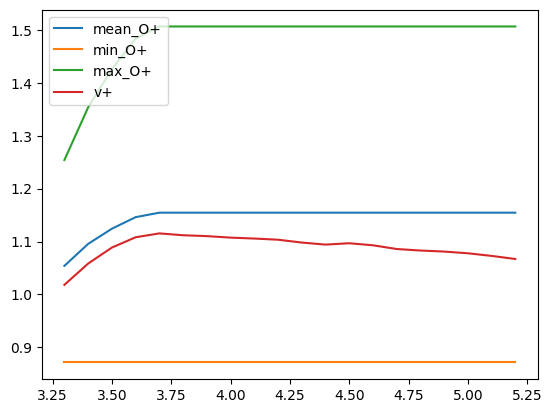

In [788]:
TLO_back_info['cluster_info'][['mean_O+','min_O+','max_O+','v+']].plot()
# plt.plot(Ks_back,O_2O)

# plt.plot(Ks_back,get_O_r(R0,Rp) )

In [762]:
norm.ppf(r0[-1]/2+r2+0.5) - 
# O_O -shift_O

1.4078864582903816

In [760]:
get_O_r(rM,r2)

0.9811713455525322

In [639]:
Ks = TLO_info['Theta_last'].index
iloc = np.searchsorted(Ks,K_end)
Theta_last = TLO_info['Theta_last'].iloc[iloc].to_numpy(float)

In [640]:
# TLO_back_info = Qsimul.TLO_back(Theta_last,K_end)
Ks_back = TLO_back_info['Ks']
r_info_back = TLO_back_info['r_info']
cluster_info_back = TLO_back_info['r_info']

In [1129]:
RS[2:4]

Index(['r+', 'r-'], dtype='object')

Text(0.5, 0, '$K$')

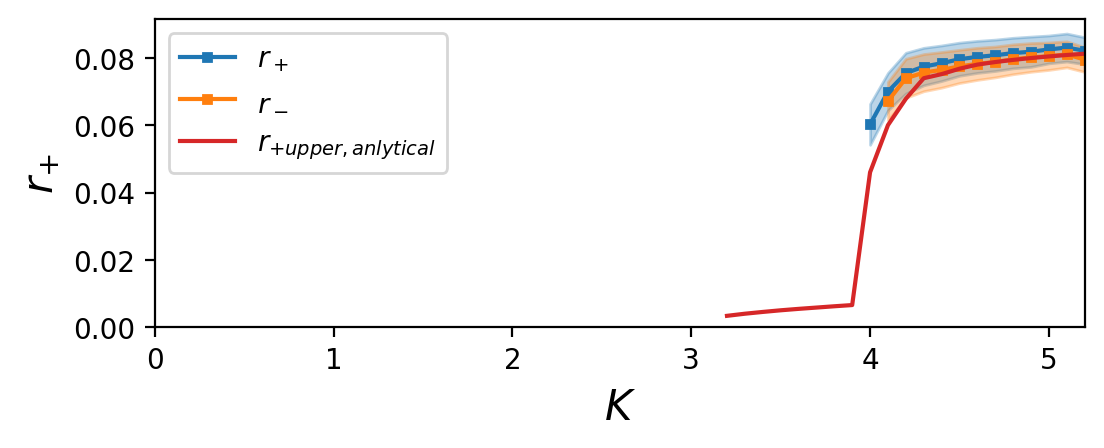

In [111]:
RS = r_info_back.columns[0:8]
fig = plt.figure(figsize=(6,2),dpi=200)
# plt.plot(r_info_back[RS[2:4]],marker='s',markersize=3)
plt.plot(r_info_back[RS[2:4]],marker='s',markersize=3)
# plt.plot(r_info_back[['r+_total','r-_total']],marker='s',markersize=3)
plt.fill_between(r_info_back['r+'].index,(r_info_back['r+']-r_info_back['sig+']).to_numpy(float),
                 (r_info_back['r+']+r_info_back['sig+']).to_numpy(float),color='tab:blue',alpha=0.3)

plt.fill_between(r_info_back['r-'].index,(r_info_back['r-']-r_info_back['sig-']).to_numpy(float),
                 (r_info_back['r-']+r_info_back['sig-']).to_numpy(float),color='tab:orange',alpha=0.3)

# K_step_index = df_STEP.index
# for K_step in K_step_index[:2]:
#     Ks_step = df_STEP.loc[K_step]['Ks_step']
#     F_RMu_s = df_STEP.loc[K_step]['F_RMu']
#     F_R0u_s = df_STEP.loc[K_step]['F_R0u']
#     rs_d_s = df_STEP.loc[K_step]['rs_d']
#     rs_u_s = df_STEP.loc[K_step]['rs_u']
#     S_start = df_STEP.loc[K_step]['S_start']
#     S_end = df_STEP.loc[K_step]['S_end']
#     S_sidx = np.searchsorted(Ks_step,S_start)
#     S_eidx = np.searchsorted(Ks_step,S_end)
    
#     plt.scatter(Ks_step[S_sidx],rs_u_s[S_sidx],color='tab:red')
#     plt.axvline(S_start,color ='tab:red',ls='--',alpha=0.3)
#     # plt.scatter(Ks_step[S_sidx],rs_u_s[S_sidx],color='tab:red')
#     # plt.scatter(Ks_step[S_eidx],rs_u_s[S_eidx],color='black')

#     # plt.plot(Ks_step,F_RMu_s(Ks_step),color='tab:blue')
#     # plt.plot(Ks_step,F_R0u_s(Ks_step),color='tab:orange')
#     plt.plot(Ks_step,rs_u_s,color='tab:red')
#     plt.plot(Ks_step,rs_d_s,color='tab:gray')
plt.plot(np.nan,np.nan,color='tab:blue',label ='$r_+$',marker='s',markersize=3)
plt.plot(np.nan,np.nan,color='tab:orange',label ='$r_-$',marker='s',markersize=3)
# sd_ = plt.plot(np.nan,np.nan,color='tab:grey',label ='$r_{+lower,anlytical}$')
su_ = plt.plot(np.nan,np.nan,color='tab:red',label ='$r_{+upper,anlytical}$')
# l_ = plt.scatter(np.nan,np.nan,color='tab:red',label ='$r_{-step}$')
plt.legend()
# plt.plot(Ks_S,F4_RMu(Ks_S))
# plt.plot(Ks_S,F4_R0u(Ks_S))
# plt.plot(Ks,F_RMu(Ks))
# plt.plot(Ks,F_R0u(Ks))
# plt.plot(Ks,rs_u,color='tab:red')
# plt.plot(Ks,rs_d,color='tab:gray')
# DR = (F0_R0u(Ks_back)-F0_RMu(Ks_back))/2
# plt.plot(Ks_back,DR)
# plt.plot(Ks_back,r_info_back['r-'].to_numpy(float)[-1]+DR-DR[-1])
# plt.plot(Ks_back,rs_ub,color='tab:red')
# plt.plot(Ks_back,rs_db,color='tab:gray')
# plt.axvline(Ks_back[idx])
plt.plot(Ks_back,rs_ub2,color='tab:red')
plt.plot(Ks_back,rs_db2,color='tab:gray')


# plt.plot(Ks_back,rs_ub2,color='tab:red')
# plt.plot(Ks_back,rs_db2,color='tab:gray')

# SU, = plt.plot(Ks,rs_u,color='tab:red')
# SD, = plt.plot(Ks,rs_d,color='tab:gray')
# plt.plot(Ks_back,rs_ub3,color='tab:red')
# plt.plot(Ks_back,rs_db3,color='tab:gray')

# plt.plot(Ks_back,rs_ubl3,color='tab:red',alpha=0.3)
# plt.plot(Ks_back,rs_dbl3,color='tab:gray',alpha=0.3)


# plt.plot(Ks_back,rs_ubl4,color='tab:red')
# plt.plot(Ks_back,rs_dbl4,color='tab:gray')

# plt.plot(Ks,rs_u,color='tab:red')
# plt.plot(Ks,rs_d,color='tab:gray')

plt.ylim(0)
plt.xlim(0,K_end)
plt.ylabel('$r_{+}$',fontsize=15)
plt.xlabel('$K$',fontsize=15)

In [ ]:
def get_shift(O_0):
    r_last = norm.cdf(O_0)
    O_samples = np.linspace(O_0,3,1000)
    r_ = norm.cdf(O_samples)
    def get_O_r(r_):
        r_s = np.linspace(r_last,r_,20000,endpoint=False)
        A = norm.ppf(r_s)
        O_r = np.mean(A)
        shift_O = O_r - O_0
        return O_r,shift_O
    FO_r = np.vectorize(get_O_r)
    O_rs,shift_Os = FO_r(r_)
    Ops = O_samples-O_rs
    F_shift  = interpolate.interp1d(Ops,shift_Os, kind='linear',bounds_error=False)

    return F_shift

In [259]:
RS = r_info.columns[0:8]
RS[5]

'sig0'

Text(0, 0.5, '$r_0$')

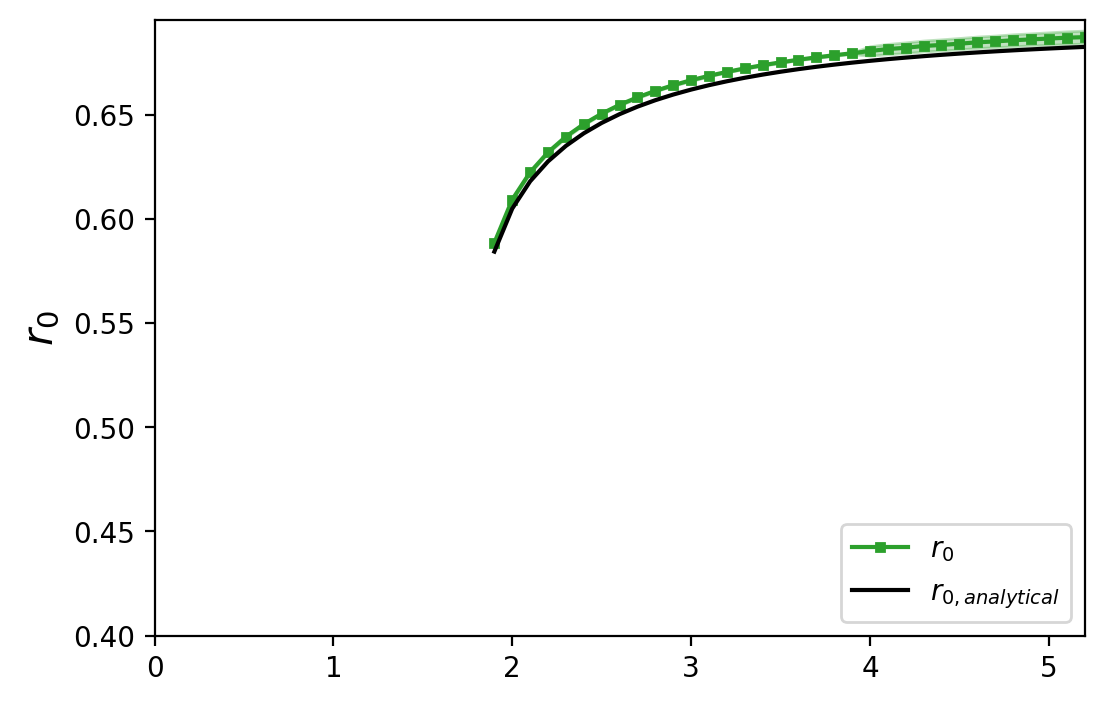

In [112]:
RS = r_info_back.columns[0:8]
fig = plt.figure(figsize=(6,4),dpi=200)
plt.plot(r_info_back[RS[1]],color='tab:green',marker='s',markersize=3)
plt.fill_between(r_info_back[RS[1]].index,(r_info_back[RS[1]]-r_info_back['sig0']).to_numpy(float),
                 (r_info_back[RS[1]]+r_info_back['sig0']).to_numpy(float),color='tab:green',alpha=0.3)


# K_step_index = df_STEP.index
# for K_step in K_step_index[:2]:
#     Ks_step = df_STEP.loc[K_step]['Ks_step']
#     F_RMu_s = df_STEP.loc[K_step]['F_RMu']
#     F_R0u_s = df_STEP.loc[K_step]['F_R0u']
#     rs_d_s = df_STEP.loc[K_step]['rs_d']
#     rs_u_s = df_STEP.loc[K_step]['rs_u']
#     S_start = df_STEP.loc[K_step]['S_start']
#     S_end = df_STEP.loc[K_step]['S_end']
#     S_sidx = np.searchsorted(Ks_step,S_start)
#     S_eidx = np.searchsorted(Ks_step,S_end)
    
#     plt.scatter(Ks_step[S_sidx],F_R0u_s(Ks_step)[S_sidx],color='black')
#     plt.axvline(S_start,color ='tab:red',ls='--',alpha=0.3)
#     plt.plot(Ks_step,F_R0u_s(Ks_step),color='black')
plt.plot(np.nan,np.nan,color='tab:green',label ='$r_0$',marker='s',markersize=3)
sd_ = plt.plot(np.nan,np.nan,color='black',label ='$r_{0,analytical}$')
# su_ = plt.plot(np.nan,np.nan,color='tab:red',label ='$r+_{upper}$')
# l_ = plt.scatter(np.nan,np.nan,color='black',label ='$r_{0,step}$')
plt.legend(loc=4)
# plt.plot(Ks_S,F4_RMu(Ks_S))
# plt.plot(Ks_S,F4_R0u(Ks_S))
# plt.plot(Ks,F0_RMu(Ks),color='black')
plt.plot(Ks,F0_R0u(Ks),color='black')
# plt.plot(Ks,F_RMu(Ks),color='black')
# plt.plot(Ks,F_R0u(Ks),color='black')
# plt.plot(r_info[RS[1]],color='tab:green',marker='s',markersize=3)
# plt.fill_between(r_info[RS[1]].index,(r_info[RS[1]]-r_info['sig0']).to_numpy(float),
#                  (r_info[RS[1]]+r_info['sig0']).to_numpy(float),color='tab:green',alpha=0.3)

# plt.plot(Ks,F_R0u(Ks))
# plt.plot(Ks,rs_u,color='tab:red')
# plt.plot(Ks,rs_d,color='tab:gray')
plt.ylim(0.4)

plt.xlim(0,K_end)
plt.ylabel('$r_0$',fontsize=15)
# plt.xlabel('$K$',fontsize=15)

In [325]:
m

7

In [33]:
K_ = np.linspace(0,15,10000)

Text(0.5, 1.0, '$m = 5, N = 1000$')

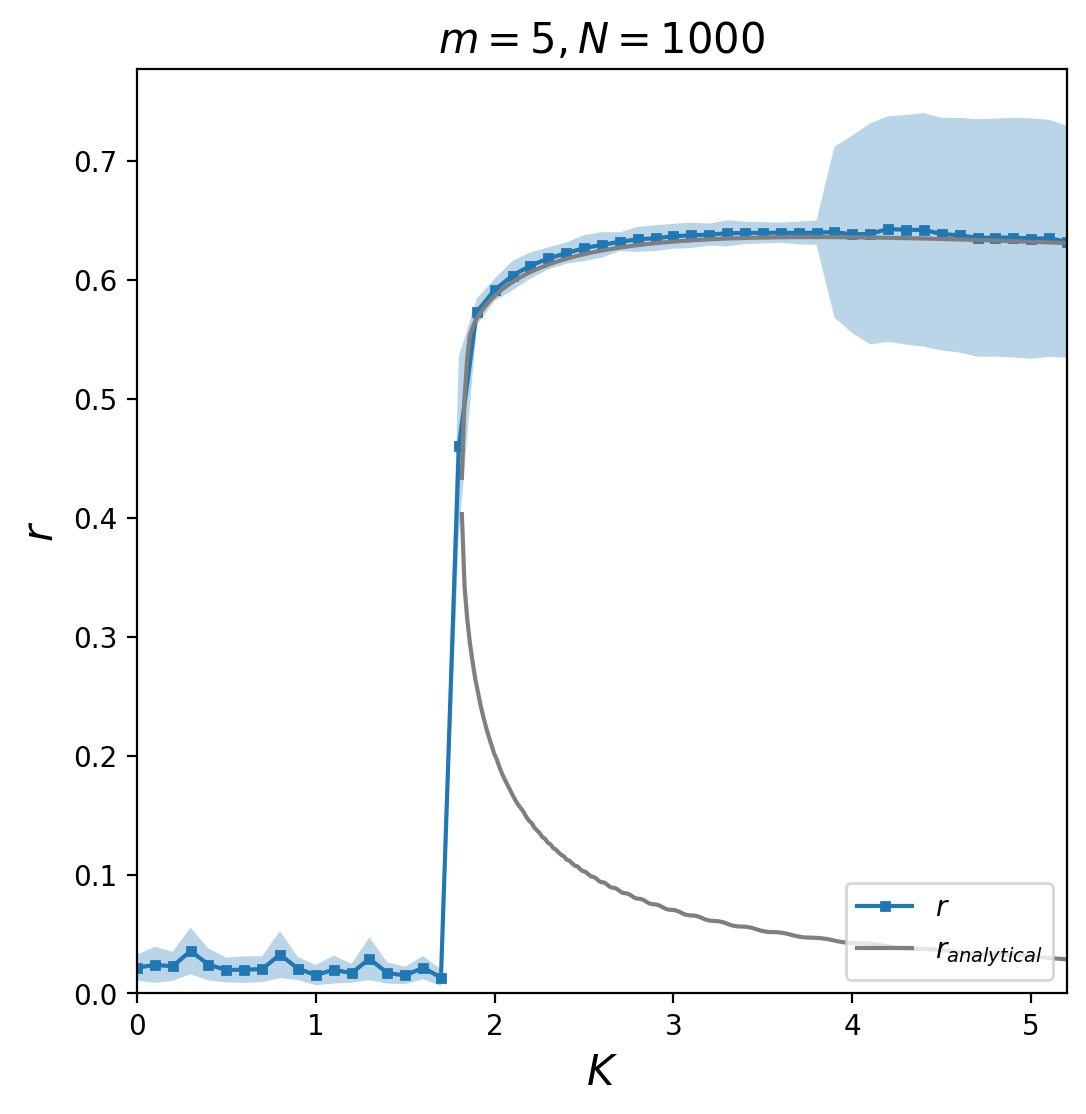

In [113]:
RS = r_info_back.columns[0:5]
fig = plt.figure(figsize=(6,6),dpi=200)
# plt.plot(r_info_back[RS[1]],color='tab:green',marker='s',markersize=3)
plt.plot(r_info_back[RS[0]],color='tab:blue',marker='s',markersize=3)
# plt.fill_between(r_info_back[RS[2]],color='tab:green',marker='s',markersize=3)
plt.fill_between(r_info_back['sig_mean'].index,(r_info_back[RS[0]]-r_info_back['sig_mean']).to_numpy(float),
                 (r_info_back[RS[0]]+r_info_back['sig_mean']).to_numpy(float),alpha=0.3)



# K_step_index = df_STEP.index
# for K_step in K_step_index[:2]:
#     Ks_step = df_STEP.loc[K_step]['Ks_step']
#     F_RMu_s = df_STEP.loc[K_step]['F_RMu']
#     F_R0u_s = df_STEP.loc[K_step]['F_R0u']
#     rs_d_s = df_STEP.loc[K_step]['rs_d']
#     rs_u_s = df_STEP.loc[K_step]['rs_u']
#     S_start = df_STEP.loc[K_step]['S_start']
#     S_end = df_STEP.loc[K_step]['S_end']
#     S_sidx = np.searchsorted(Ks_step,S_start)
#     S_eidx = np.searchsorted(Ks_step,S_end)
    
#     plt.scatter(Ks_step[S_sidx],F_RMu_s(Ks_step)[S_sidx],color='tab:grey')
#     plt.axvline(S_start,color ='tab:red',ls='--',alpha=0.3)
#     plt.plot(Ks_step,F_RMu_s(Ks_step),color='tab:grey')
plt.plot(np.nan,np.nan,color='tab:blue',label ='$r$',marker='s',markersize=3)
sd_ = plt.plot(np.nan,np.nan,color='tab:grey',label ='$r_{analytical}$')
# su_ = plt.plot(np.nan,np.nan,color='tab:red',label ='$r+_{upper}$')
# l_ = plt.scatter(np.nan,np.nan,color='tab:grey',label ='$r_{step}$')
plt.legend(loc=4)
# plt.plot(Ks_S,F4_RMu(Ks_S))
# plt.plot(Ks_S,F4_R0u(Ks_S))
plt.plot(K_,F0_RMu(K_),color='tab:grey')
plt.plot(K_,F0_RMd(K_),color='tab:grey')
# R_STD = OSP2.get_rstd(F0_R0u(Ks),rs_u,K,m)
# plt.fill_between(Ks,F_R0u(Ks)-R_STD,F_R0u(Ks)+R_STD,alpha=0.3,color='tab:grey')

# plt.plot(Ks,F_R0u(Ks))
# plt.plot(Ks,rs_u,color='tab:red')
# plt.plot(Ks,rs_d,color='tab:gray')
plt.ylim(0.0)
plt.xlim(0,K_end)
plt.ylabel('$r$',fontsize=15)
plt.xlabel('$K$',fontsize=15)
plt.title(rf'$m = {m}, N = {N}$',fontsize=15)

In [100]:
K_end

6.2

In [450]:
Ks_ = TLO_info['Theta_last'].index
K_end = 6.2
iloc = np.searchsorted(Ks_,K_end)
Theta_last = TLO_info['Theta_last'].iloc[iloc].to_numpy(float)
O_0 = TLO_info['cluster_info'].iloc[iloc]['max_O0']
r_0 = TLO_info['r_info']['r0'].iloc[iloc]
O_0 = norm.ppf(r_0/2+0.5)
F0_RMd,F0_RMu,F0_R0d,F0_R0u =  OSP.Make_R0_function(m,O_0)

KeyboardInterrupt: 

In [171]:
Ks_back = np.arange(0.0,7+0.1/2,0.1)
rs_d,rs_u= OSP.get_r_sec_np(Ks_back,m,F_R0u,samples=30)

In [272]:
TLO_back_info['cluster_info']

,S0,S+,S-,v0,v+,v-,max_O0,max_O+,max_O-,min_O0,min_O+,min_O-,mean_O0,mean_O+,mean_O-
0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7.6,388,39,35,-0.011106,1.257194,-1.279176,1.227697,1.751613,-1.217135,-1.238397,1.176185,-1.751613,-0.012337,1.435804,-1.46313
7.7,388,NaN,35,-0.011372,NaN,-1.275763,1.227697,NaN,-1.217135,-1.238397,NaN,-1.751613,-0.012337,NaN,-1.46313
7.8,388,38,35,-0.011911,1.239504,-1.262393,1.227697,1.72887,-1.217135,-1.238397,1.176185,-1.751613,-0.012337,1.427493,-1.46313
7.9,388,38,35,-0.011698,1.229916,-1.253152,1.227697,1.72887,-1.217135,-1.238397,1.176185,-1.751613,-0.012337,1.427493,-1.46313


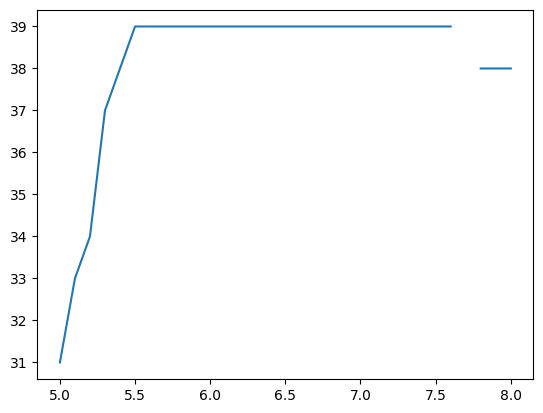

In [276]:
plt.plot(TLO_back_info['cluster_info']['S+'])

In [285]:
TLO_back_info['r_info']['r0'].to_numpy()

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, 0.6315965111937955,
       0.6710134296201938, 0.6882170990138738, 0.7002037816186264,
       0.7093203563402861, 0.7165871921675299, 0.7225555639344928,
       0.7275650055930041, 0.7318153050513613, 0.7354746858154719,
       0.7386722907774319, 0.7414637689977535, 0.7439316491164825,
       0.7461265918950021, 0.748092871379439, 0.7498574238001808,
       0.7514485202620159, 0.7528988122481061, 0.7542169952369884,
       0.7554011268248974, 0.7565037160407962, 0.7575134946352282,
       0.758433973938303, 0.759292508921435, 0.7600794780303641,
       0.7608183347728018, 0.7614962257243362, 0.7621386327577755,
       0.7627262663325828, 0.7632874167217272, 0.7637953456676768,
       0.7643372496779481, 0.7648051261826271, 0.7652666957833255,
       0.7657070725604475, 0.7660766847464833, 0.7664254587963193,
       0.7667903541108577, 0.76710752442187, 0.7674229803731334,
     

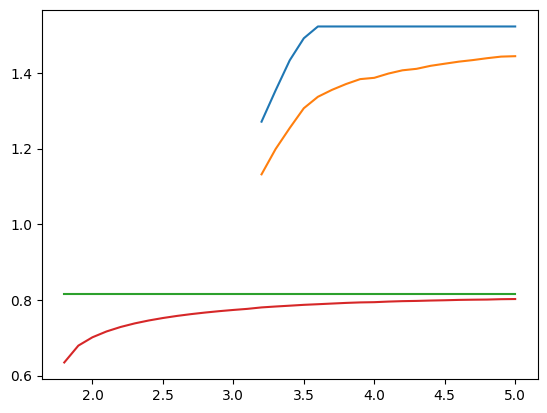

In [338]:
# plt.plot(TLO_back_info['cluster_info']['v+'],lw=3,color='tab:blue',label=r'$\Omega^{+}$')
# plt.plot(TLO_back_info['r_info']['r_mean']*Ks_back)#,lw=3,color='tab:blue',label=r'$\Omega^{+}$')
# plt.plot(TLO_back_info['r_info']['r+']*Ks_back+TLO_back_info['cluster_info']['max_O+'])#,lw=3,color='tab:blue',label=r'$\Omega^{+}$')
plt.plot(TLO_back_info['cluster_info']['max_O+'])
plt.plot(Ks_back,norm.ppf(TLO_back_info['r_info']['r0'].to_numpy(float)/2+0.5+TLO_back_info['r_info']['r+'].to_numpy(float)))#+TLO_back_info['r_info']['r+']))
plt.plot(TLO_back_info['cluster_info']['max_O0'])
plt.plot(Ks_back,norm.ppf(TLO_back_info['r_info']['r0'].to_numpy(float)/2+0.5))#+TLO_back_info['r_info']['r+']))


In [391]:
from scipy.integrate import quad

In [392]:
def INT(X):
    f_ =  lambda x:np.sqrt(1-((x)/X)**2)
    y_,_ = quad(f_,-0.1,0.1)
    return y_
y__ = np.vectorize(INT)

In [395]:
Xs = np.linspace(0.1,1,100)
Y = y__(Xs)

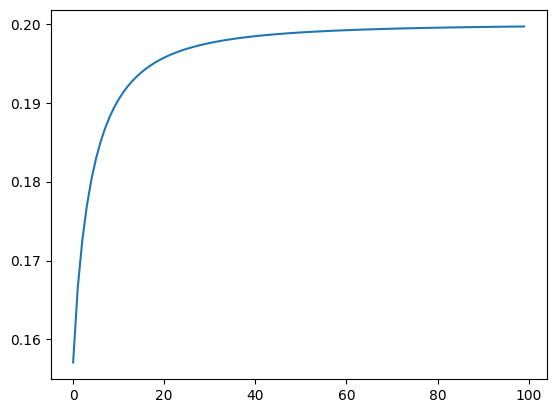

In [397]:
plt.plot(Y)

Backward theory check

In [590]:
from scipy.integrate import quad
def g_n(x):
    return norm.pdf(x,0,1)
def FX_lock1(X,m,g=g_n):
    integrand_lock = lambda x:np.cos(x)**2*g(X*np.sin(x))
    omega_p = (4/np.pi)*np.sqrt(X/m)

    A = omega_p/X
    if abs(A)<=1:
        theta_p = np.arcsin(A)
        I_l,err = quad(integrand_lock,-theta_p,theta_p,limit=200)
        return I_l
    else: 
        theta_p = np.arcsin(A)
        I_l,err = quad(integrand_lock,-np.pi/2,np.pi/2,limit=200)
        return I_l

def FX_drift1(X,m,g=g_n):
    if m == 0:
        return 0
    O_p = (4/np.pi)*np.sqrt(X/m)
    integrand_drift = lambda x:1/(x**2)*g(x)
    I_d,err = quad(integrand_drift,O_p,np.inf,limit=200)
    return -1/(m)*I_d

def FX_0(X,m,O_0,g=g_n):
    O_d = min(O_0,X)
    theta_0 = np.arcsin(O_d/X)
    integrand_l = lambda x:np.cos(x)**2*g(X*np.sin(x))
    integrand_d = lambda x:(1/x**2)*g(x)
    I_l,err_l = quad(integrand_l,-theta_0,theta_0,limit=200) #lock
    I_d,err_d = quad(integrand_d,O_d,np.inf,limit=200) #drift
    Fl = 1*I_l
    Fd = - 1/(m)*I_d
    F0 = Fl + Fd
    return F0,Fl,Fd
get_FX_l1 = np.vectorize(FX_lock1)
get_FX_d1 = np.vectorize(FX_drift1)
get_FX_0 = np.vectorize(FX_0)


def g_sec(x,Or,Om):
    g = norm.pdf(x,-Or,1)
    dO = abs(Or-Om)
    return np.where(x<-dO,1e-6,g)

def get_O_r(r):
    r_s = np.linspace(r/2+0.5,1,5000,endpoint=False)
    A = norm.ppf(r_s)
    return np.mean(A)

def F_lock2(r,K,m,F_R0, g=g_sec):
    X = K*r
    r_0 = F_R0(K)
    O_pm = norm.ppf(r_0/2+0.5)
    O_r = get_O_r(r_0)
    # shift = -(K**2*r*r_0)/(2*(O_pm)**2)/m - (K**2*r*r)/(8*(O_pm)**2)/m 
    shift = lambda x: -(K**2*r*r_0)/(2*(O_r+X*np.sin(x))**2)/m - (K**2*r*r)/(8*(O_r+X*np.sin(x))**2)/m

    integrand_lock = lambda x:np.cos(x)**2*g(X*np.sin(x)+shift(x),O_r,O_pm)
    # integrand_lock = lambda x:np.cos(x)**2*g(X*np.sin(x),O_r,O_pm)
    O_p = (4/np.pi)*np.sqrt(X/m)

    A = O_p/X
    A = np.where(abs(A)<=1,A,1)
    # if abs(A)<=1:
    theta_p = np.arcsin(A)
    I_l,err = quad(integrand_lock,-theta_p,theta_p,limit=200)
    return I_l
    


def F_sec0(r,K,m,r_01,r_02,F_R0, g=g_sec):
    X = K*r
    r_0 = F_R0(K)
    O_pm = norm.ppf(r_01/2+0.5)
    O_r = get_O_r(r_01)
    O_02 = norm.ppf(r_01/2+0.5 + r_02)
    # shift = -(K**2*r_02*r_01)/(2*(O_pm)**2)/m - (K**2*r_02*r_02)/(8*(O_pm)**2)/m 

    # shift0 = -(K**2*r*r_01)/(2*(O_pm)**2)/m - (K**2*r*r)/(8*(O_pm)**2)/m 
    O_02 = O_02-O_pm
    O_d = min(O_02,X)
    theta_0 = np.arcsin(O_d/X)
    # print(O_02)
    shift = lambda x: -(K**2*r*r_0)/(2*(O_r+X*np.sin(x))**2)/m - (K**2*r*r)/(8*(O_r+X*np.sin(x))**2)/m 

    integrand_lock = lambda x:np.cos(x)**2*g(X*np.sin(x)+shift(x),O_r,O_pm)
    # integrand_lock = lambda x:np.cos(x)**2*g(X*np.sin(x)+shift,O_r,O_pm)
    O_p = (4/np.pi)*np.sqrt(X/m)

    I_l,err = quad(integrand_lock,-theta_0,theta_0,limit=200)
    return I_l


def F_drift2(r,K,m,F_R0,g=g_sec):
    X = K*r
    r_0 = F_R0(K)
    O_pm = norm.ppf(r_0/2+0.5)
    O_r = get_O_r(r_0)
    O_p = (4/np.pi)*np.sqrt(X/m)
    # shift = -(K**2*r*r_0)/(2*(O_pm)**2)/m -(K**2*r*r)/(8*(O_pm)**2)/m 
    shift = lambda x: -(K**2*r*r_0)/(2*(O_r+x)**2)/m - (K**2*r*r)/(8*(O_r+x)**2)/m

    # integrand_drift = lambda x:1/(2*x**2)*g(x+shift,O_r,O_pm)
    integrand_drift = lambda x:1/(2*x**2)*g(x+shift(x),O_r,O_pm)
    I_d,err = quad(integrand_drift,O_p,np.inf,limit=200)
    # I_dm,err = quad(integrand_drift,-np.inf,-O_p,limit=200)
    return -1/(m)*(I_d)


def F_sec(r,K,m,F_R0,g=g_sec):
    F_l2 = F_lock2(r,K,m,F_R0, g)
    F_d2 = F_drift2(r,K,m,F_R0, g)
    return F_l2+F_d2


def check_F_sec(r,K,m,F_R0,g=g_sec):
    F_l2 = F_lock2(r,K,m,F_R0, g)
    F_d2 = F_drift2(r,K,m,F_R0, g)
    return F_l2+F_d2 -1/K

def Bisection(f,a,b,eps =1e-5,end=30,arg=()):
    c = (a+b)/2
    num = 0 
    while abs(f(c,*arg))>eps:
        c = (a+b)/2
        if f(a,*arg)*f(c,*arg)>0:a = c
        else:b = c
        num+=1
        if num >end:return np.NAN
    return c


get_Fp_l = np.vectorize(F_lock2)
get_Fp_d = np.vectorize(F_drift2)
get_F2 = np.vectorize(F_sec)
get_F20 = np.vectorize(F_sec0)
from scipy import interpolate
def get_r_sec(K,m,FR,samples=200):
    r0_ =  FR(K)
    r_sd,r_su = np.nan,np.nan
    r_su_d,r_su_l = np.nan,np.nan
    if K == 0:
        return r_sd,r_su,r_su_d,r_su_l
    r_test = np.linspace(1e-5,(1-r0_)/2,samples)
    F2 = get_F2(r_test,K,m,FR)
    R2_interpolate  = interpolate.interp1d(r_test,F2, kind='linear',bounds_error=False)
    r_test2 = np.linspace(1e-5,(1-r0_)/2,10000)
    Fs = R2_interpolate(r_test2)
    cross_point = np.sign((Fs[0:-1]-1/K)*(Fs[1:]-1/K))*(-0.5) + 0.5
    arg_check, = np.where(cross_point)

    r_sec = (r_test2[arg_check] +r_test2[arg_check+1])/2
    if len(r_sec)==2:
        r_sd,r_su = r_sec
    if len(r_sec)==1:
        r_su = r_sec
    r_su_l = r_su*K*F_lock2(r_su,K,m,F_R0=FR,g=g_sec)
    r_sd_l = r_sd*K*F_lock2(r_sd,K,m,F_R0=FR,g=g_sec)
    return r_sd,r_su,r_sd_l,r_su_l

def get_r_sec0(K,m,r_01,r_02,FR,samples=200):
    r0_ =  FR(K)
    r_sd,r_su = np.nan,np.nan
    r_su_d,r_su_l = np.nan,np.nan
    if K == 0:
        return r_sd,r_su,r_su_d,r_su_l
    r_test = np.linspace(1e-5,(1-r0_)/2,samples)
    F2 = get_F20(r_test,K,m,r_01,r_02,FR)
    R2_interpolate  = interpolate.interp1d(r_test,F2, kind='linear',bounds_error=False)
    r_test2 = np.linspace(1e-5,(1-r0_)/2,10000)
    Fs = R2_interpolate(r_test2)
    cross_point = np.sign((Fs[0:-1]-1/K)*(Fs[1:]-1/K))*(-0.5) + 0.5
    arg_check, = np.where(cross_point)

    r_sec = (r_test2[arg_check] +r_test2[arg_check+1])/2
    if len(r_sec)==2:
        r_sd,r_su = r_sec
    if len(r_sec)==1:
        r_su = r_sec
    r_su_l = r_su*K*F_sec0(r_su,K,m,r_01,r_02,F_R0=FR,g=g_sec)
    r_sd_l = r_sd*K*F_sec0(r_sd,K,m,r_01,r_02,F_R0=FR,g=g_sec)
    return r_sd,r_su,r_sd_l,r_su_l

get_r_sec_np = np.vectorize(get_r_sec)
get_r_sec0_np = np.vectorize(get_r_sec0)

In [577]:
for K_step in K_step_index[:1]:
    Ks_step = df_STEP.loc[K_step]['Ks_step']
    F_RMu_s = df_STEP.loc[K_step]['F_RMu']
    F_R0u_s = df_STEP.loc[K_step]['F_R0u']
    rs_d_s = df_STEP.loc[K_step]['rs_d']
    rs_u_s = df_STEP.loc[K_step]['rs_u']
    S_start = df_STEP.loc[K_step]['S_start']
    S_end = df_STEP.loc[K_step]['S_end']
    S_sidx = np.searchsorted(Ks_step,S_start)
    S_eidx = np.searchsorted(Ks_step,S_end)

In [547]:
del get_r_sec_np

In [423]:
np.arcsin(1) /np.pi*2

1.0

In [591]:
rs_db3,rs_ub3,rs_dbl3,rs_ubl3 = get_r_sec_np(Ks_back,m,F_R0u_s,samples=30)

In [586]:
Ks_back = np.arange(0.0,K_end+0.1/2,0.1)
rs_db3,rs_ub3,rs_dbl3,rs_ubl3 = get_r_sec_np(Ks_back,m,F0_R0u,samples=30)
# rs_db3,rs_ub3,rs_dbl3,rs_ubl3 = get_r_sec_np(Ks_back,m,F0_R0u,samples=30)

KeyboardInterrupt: 

In [416]:
O_02 = norm.ppf(TLO_back_info['r_info']['r0'].to_numpy(float)/2+0.5+TLO_back_info['r_info']['r+'].to_numpy(float))[-1]
O_01 = norm.ppf(TLO_back_info['r_info']['r0'].to_numpy(float)/2+0.5)[-1]
r_01 = TLO_back_info['r_info']['r0'].to_numpy(float)[-1]
r_02 = TLO_back_info['r_info']['r+'].to_numpy(float)[-1]

In [ ]:
rs_db4,rs_ub4,rs_dbl4,rs_ubl4 = get_r_sec0_np(Ks_back,m,r_01,r_02,F0_R0u,samples=30)


In [570]:
# rs_dF,rs_uF,rs_dFl,rs_uFl = get_r_sec_np(Ks,m,F_R0u,samples=30)
# A = get_r_sec_np(Ks,m,F_R0u,samples=30)
_,_,rs_dFl2,rs_uFl2 = get_r_sec_np(Ks,m,F_R0u,samples=30)


In [485]:
Ks = np.arange(0,10,0.1)

In [511]:
m = 4.44
F_RMd,F_RMu,F_R0d,F_R0u =  OSP.Make_R_function(m)

In [529]:
Ks_check2 = np.arange(3,6,0.01)

# _,_,rs_dFl2,rs_uFl2 = get_r_sec_np(Ks,m,F_R0u,samples=30)


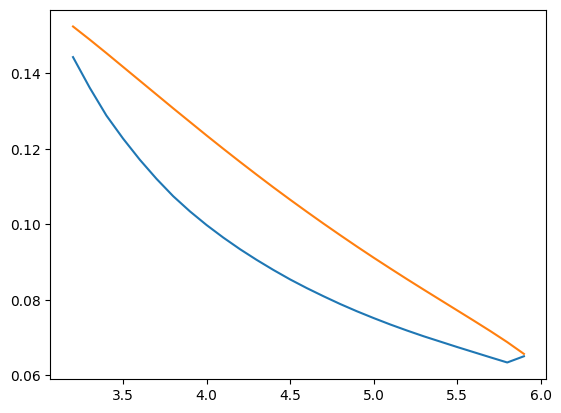

In [572]:
# plt.plot(Ks,rs_d)
# plt.plot(Ks,rs_u)
# plt.plot(Ks,rs_dFl)
# plt.plot(Ks,rs_uFl)

plt.plot(Ks,rs_dFl2,color='tab:blue')
plt.plot(Ks,rs_uFl2,color='tab:orange')
# plt.plot(Ks,_,color='tab:blue')

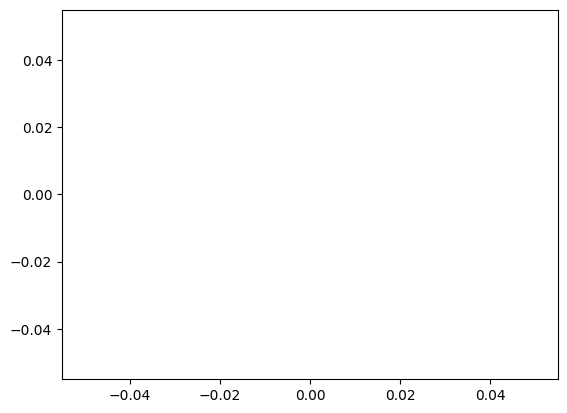

In [593]:
# plt.plot(Ks_back,rs_db)
# plt.plot(Ks_back,rs_ub)

plt.plot(Ks_back,rs_dbl3)
plt.plot(Ks_back,rs_ubl3)
# plt.plot(Ks_back,rs_ub)

# plt.plot(Ks_back,rs_dbl4)
# plt.plot(Ks_back,rs_ubl4)

## cluster_visualization

In [52]:
import matplotlib.colors as mcl

In [400]:
TLO_back_info['cluster_info']['S+'].dropna()

5.0    31
5.1    33
5.2    34
5.3    37
5.4    38
5.5    39
5.6    39
5.7    39
5.8    39
5.9    39
6.0    39
6.1    39
6.2    39
6.3    39
6.4    39
6.5    39
6.6    39
6.7    39
6.8    39
6.9    39
7.0    39
7.1    39
7.2    39
7.3    39
7.4    39
7.5    39
7.6    39
7.8    38
7.9    38
8.0    38
Name: S+, dtype: object

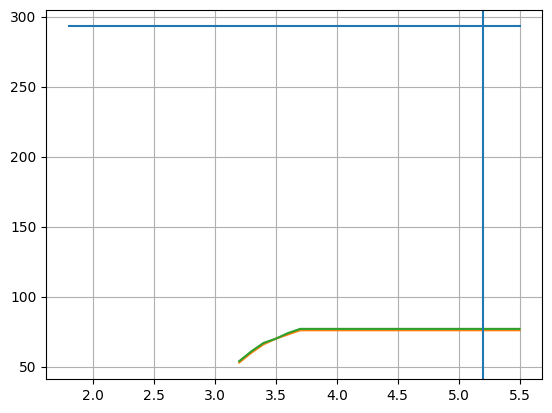

In [717]:
plt.plot(TLO_back_info['cluster_info']['S0'].dropna())
plt.plot(TLO_back_info['cluster_info']['S+'].dropna())
plt.plot(TLO_back_info['cluster_info']['S-'].dropna())
plt.axvline(5.2)
plt.grid()

In [504]:
cluster_idx = TLO_info['CLU_idx']
Theta_lasts = TLO_info['Theta_last']


# cluster_idx = TLO_back_info['CLU_idx']
# Theta_lasts = TLO_back_info['Theta_last']


In [565]:
K_end = 6.5
iloc = np.searchsorted(Ks_,K_end)


In [557]:
Ks_ = Theta_lasts.index
CLU0 = cluster_idx['CLU0'].iloc[iloc]
CLUP = cluster_idx['CLU+'].iloc[iloc]
CLUM = cluster_idx['CLU-'].iloc[iloc]
try:
    if np.isnan(CLU0):CLU0 = []
except ValueError: pass

try:
    if np.isnan(CLUP):CLUP = []
except ValueError: pass
try:
    if np.isnan(CLUM):CLUM = []
except ValueError: pass
omega = Qsimul.omega


In [558]:
try:
    CLU = np.concatenate([CLU0,CLUP,CLUM])
except ValueError:
    CLU = []

not_CLU = np.setdiff1d(np.arange(N),CLU)

In [566]:
Theta = Theta_lasts.iloc[iloc]
theta = Theta[:N].to_numpy(float)
dtheta = Theta[N:].to_numpy(float)

In [567]:
rpsi = 1/N * np.sum(np.exp(1j*theta),axis=0)
rs = np.abs(rpsi)
psi = np.angle(rpsi)
n_dtheta = dtheta / np.max(abs(dtheta))
def time_oscillator():
    norm = n_dtheta
    A = (1 + (norm)/2)
    theta_ = theta - psi
    sin,cos = A*np.sin(theta_+np.pi/2), A*np.cos(theta_+np.pi/2)
    
    return cos,sin,norm,np.cos(theta_+np.pi/2),np.sin(theta_+np.pi/2)

In [568]:
Ks_[iloc]

6.5

In [569]:
c_ = np.linspace(-np.pi,np.pi,1000)
circle = {
    'x': np.cos(c_),'y':np.sin(c_)
}

In [570]:
CLUM

array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
       65, 66, 67, 68, 69, 73, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98])

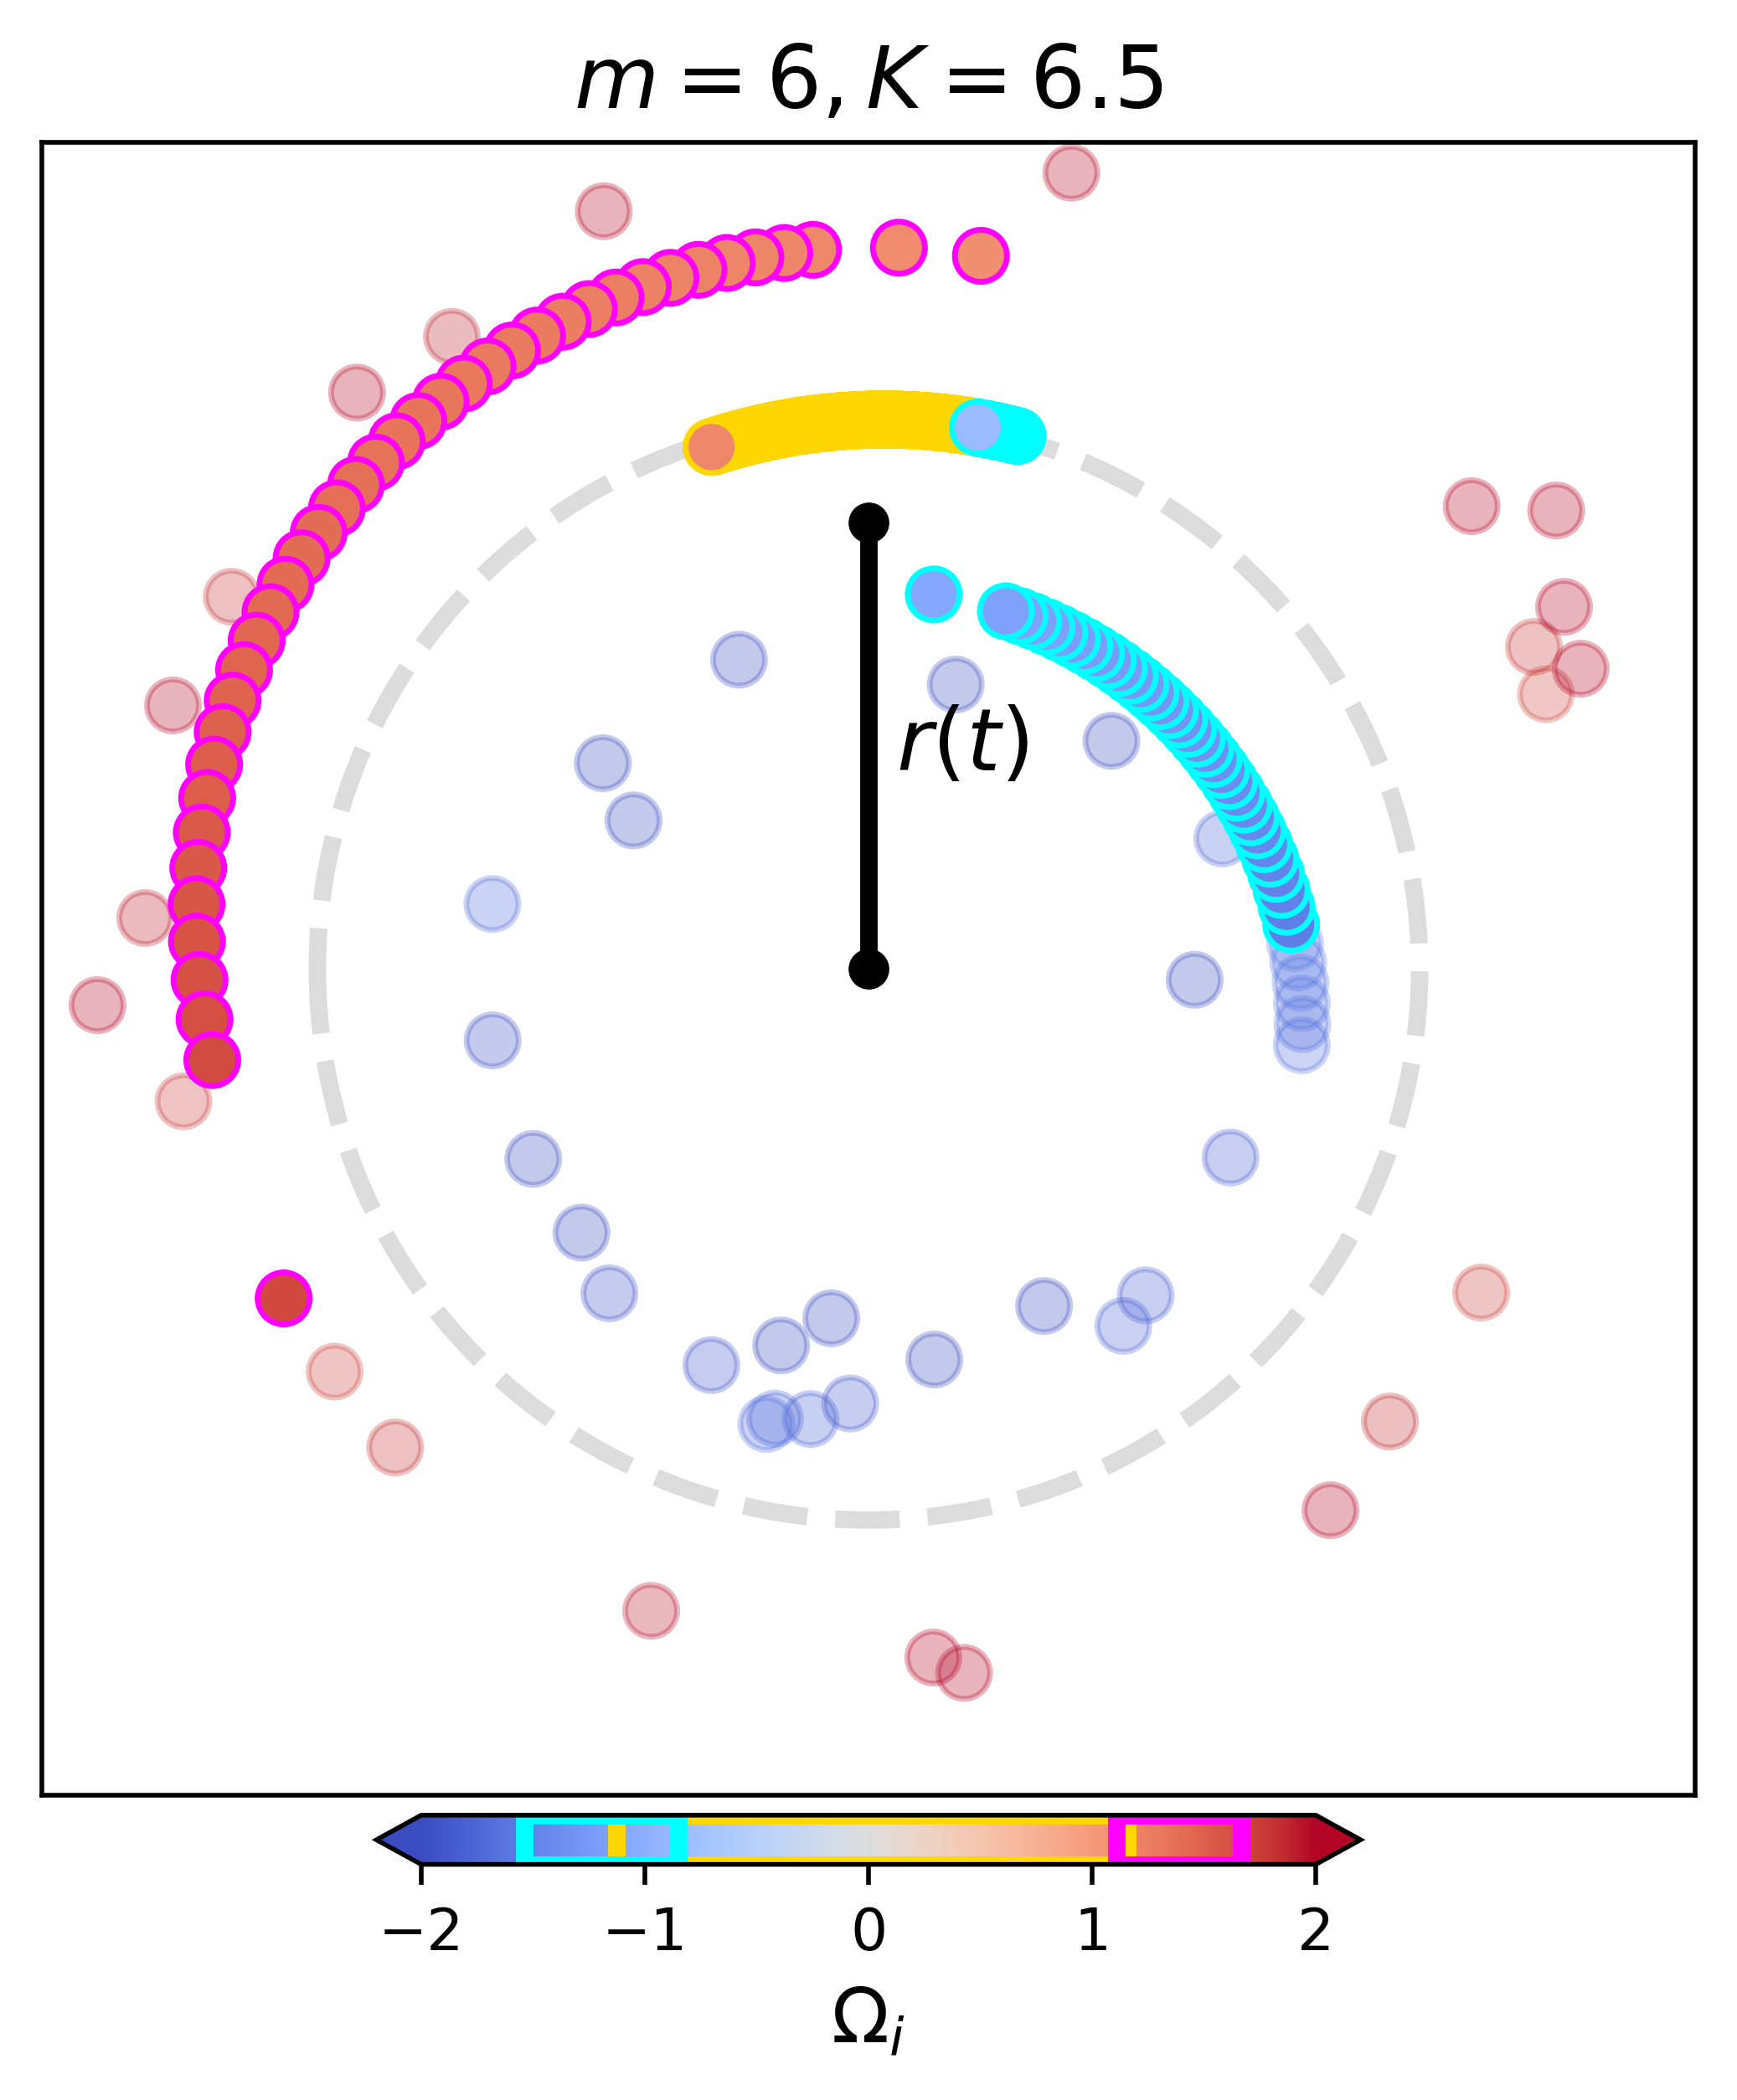

In [571]:
i = -1
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5, 5),dpi=500,facecolor=(1,1,1,0))

# colors = ['gold','darkslateblue','darkred']
colors = ['gold','aqua','fuchsia']

X,Y,C_,x,y = time_oscillator()
ax.plot([0,np.mean(x)],[0,np.mean(y)],color='black',lw=3,marker='o',zorder=3)
ax.text(np.mean(x)/2,np.mean(y)/2,' '+r'$r(t)$',horizontalalignment='left', verticalalignment='center',fontsize=15)
cmap = 'coolwarm'#'Spectral'#'viridis'#
s = 100
data = {
    'x': X[not_CLU],'y':Y[not_CLU],
    'c': omega[not_CLU],'s':80,'vmax':2,'vmin':-2,'alpha':0.3,
    'cmap':cmap,
    # 'c': colors,#ome"ga,'cmap':'YlOrRd',
}
cax_ = ax.scatter(**data,zorder=1)
alpha = 1
alpha_text = f'{round(alpha*255):02x}'
for clu,color in zip([CLU0,CLUM,CLUP],colors):
    if len(clu)!=0:
        data = {
            'x': X[clu],'y':Y[clu],
            'c': omega[clu],'cmap':cmap,
            'edgecolor':(*mcl.to_rgb(color),alpha),'linewidth':1,'s':80,'vmax':2,'vmin':-2}
        cax = ax.scatter(**data,zorder=1)


ax.plot(np.cos(c_),np.sin(c_),zorder=0,color=plt.cm.coolwarm(0.5),lw=3,ls='--')
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
# ax.axis('off')

ax.set_xticks([])
ax.set_yticks([])
# ax.text(-1.2,1.0,'(4e)',fontsize=18*multi_)
plt.tight_layout()
# ax = plt.gca()
plt.gca().set_aspect('equal')
cbar = plt.colorbar(cax,extend='both',shrink = 0.5,orientation='horizontal',location='bottom',pad=0.01)
# cbar.ax.plot([0,1],[1]*2,'w')
# for clu,color in zip([CLU0,CLUP,CLUM],colors):
for clu,color in zip([CLU0,CLUM,CLUP],colors):

    if len(clu)!=0:
        min_c,max_c = np.max(omega[clu]),np.min(omega[clu])
        cbar.ax.plot([min_c]*2,[0,1],color=color,lw=3)
        cbar.ax.plot([max_c]*2,[0,1],color=color,lw=3)
        cbar.ax.plot([min_c,max_c],[0,0],color=color,lw=3)
        cbar.ax.plot([min_c,max_c],[1,1],color=color,lw=3)
p0 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.5)[:3],0),edgecolors=colors[0])
p1 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.3)[:3],0),edgecolors=colors[1])
p2 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.7)[:3],0),edgecolors=colors[2])
# p2 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.7)[:3],0),edgecolors=colors[2])
# ax.legend([p0,p1,p2],['main cluster',r'secondary cluster $(-)$',r'secondary cluster $(+)$'],loc='lower center', bbox_to_anchor=(0.5, -0.353))
# ax.text(1.4,1.4,r'$t=t_i$',horizontalalignment='right', verticalalignment='top',fontsize=15)
plt.title(f'$m={m}, K={K_end}$',fontsize=15)
cbar.set_label('$\Omega_i$',rotation=0,fontsize=13)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

# plt.colorbar(cax)
# plt.savefig(f'./DATA_FILE/oscillator_N{N},r_{r[i]}.jpg',dpi=800, transparent=True)

In [ ]:
n1 = 1
n2 = 1.46
thetas = np.linspace(0,90)

theta_2 = np.arcsin(np.sin(np.deg2rad(thetas)))